# Final Project Multivariate Statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
color1 = '#5464beff'
color2 = '#bbc5fcff'

#green
green1 = '#03522dff'
green2 = '#2fc77eff'
green3 = '#d5fcc5ff'

In [3]:
rcParams['figure.figsize']  = 19,7
rcParams['lines.linewidth'] = 2.8
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'
rcParams['axes.titlesize']  = 13
rcParams['axes.titleweight']  = 550
rcParams['axes.grid'] = True
rcParams['grid.alpha'] = 0.19
plt.rc('axes',axisbelow=True)
plt.rc('axes.spines',top=False,bottom=False,left=False,right=False)
pd.set_option('display.max_columns',100)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('apartdata.csv')
df.head()

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5302 non-null   object 
 1   No_Rooms          5303 non-null   int64  
 2   Bathroom          5303 non-null   int64  
 3   Locality          5303 non-null   object 
 4   Region            5303 non-null   object 
 5   Longitude         5303 non-null   float64
 6   Latitude          5303 non-null   float64
 7   Furnished         5303 non-null   int64  
 8   Area              5303 non-null   float64
 9   Tower             5303 non-null   object 
 10  Total_Facilities  5303 non-null   int64  
 11  Currency          5303 non-null   object 
 12  Annual_Price      5303 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 538.7+ KB


In [7]:
df.describe()

,No_Rooms,Bathroom,Longitude,Latitude,Furnished,Area,Total_Facilities,Annual_Price
count,5303.000000,5303.000000,5303.000000,5303.000000,5303.000000,5303.000000,5303.000000,5.303000e+03
mean,1.517632,1.251367,106.836413,-6.196851,0.838959,61.080454,19.405619,9.982642e+07
std,0.963900,0.525101,0.372240,0.475304,0.367603,158.657168,3.880148,9.618815e+07
min,0.000000,0.000000,104.014900,-7.949100,0.000000,0.000000,0.000000,1.392000e+04
25%,1.000000,1.000000,106.784377,-6.237284,1.000000,33.000000,18.000000,4.200000e+07
50%,2.000000,1.000000,106.816842,-6.197352,1.000000,42.000000,20.000000,6.400000e+07
75%,2.000000,1.000000,106.851836,-6.175894,1.000000,73.000000,22.000000,1.200000e+08
max,6.000000,5.000000,119.441818,6.304300,1.000000,7781.000000,24.000000,1.296000e+09


In [8]:
df.duplicated().sum()

115

There are 115 duplicated data

In [9]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
df.sample(5)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
4423,MOI City Home 2BR View Selatan,2,1,Kelapa Gading,Jakarta Utara,106.890391,-6.149836,1,45.0,Tower MHB,23,IDR,60000000
1044,Serpong Green View Apartment 2BR View city,2,1,Serpong,Tangerang,106.686600,-6.294000,1,0.0,Tower b,16,IDR,55000000
3509,The Breeze Bintaro Apartment 1BR Fully Furnished,1,1,Bintaro,Jakarta Selatan,106.742200,-6.273700,1,34.0,Tower Breeze,16,IDR,70000000
881,Kemang View Apartment 2BR View city,2,1,Pekayon,Bekasi,106.990200,-6.256500,0,36.0,Tower flamboyan,12,IDR,24000000
1375,Park Royal Apartment 1BR Fully Furnished,1,1,Gatot Subroto,Jakarta Pusat,106.809240,-6.213072,1,63.0,Tower 3,23,IDR,178250000


In [11]:
df.isna().sum()

Unit_Name           1
No_Rooms            0
Bathroom            0
Locality            0
Region              0
Longitude           0
Latitude            0
Furnished           0
Area                0
Tower               0
Total_Facilities    0
Currency            0
Annual_Price        0
dtype: int64

In [12]:
df.isna().sum()

Unit_Name           1
No_Rooms            0
Bathroom            0
Locality            0
Region              0
Longitude           0
Latitude            0
Furnished           0
Area                0
Tower               0
Total_Facilities    0
Currency            0
Annual_Price        0
dtype: int64

Although a missing value exists in Unit_Name, there is no need to clean the data since such column won't be used in further analysis due to consist lots of unique values

# 2. Preprocessing

In this project, we will only use apartment located in Jabodetabek. Thus, we need to omit the data outside of that area

In [13]:
df.Region.value_counts()

Jakarta Selatan    1498
Jakarta Barat      1316
Jakarta Pusat      1054
Jakarta Utara       411
Jakarta Timur       364
Tangerang           317
Bekasi              100
Depok                65
Bandung              33
Surabaya             13
Karawang              5
Sumedang              4
Bogor                 3
Jogjakarta            1
Semarang              1
Malang                1
Makassar              1
Batam                 1
Name: Region, dtype: int64

## 2.1 Get apartment located in Jabodetabek

In [14]:
jakarta = df[df.Region.str.contains('Jakarta')]
bekasi = df[df.Region.str.contains('Bekasi')]
depok = df[df.Region.str.contains('Depok')]
tangerang = df[df.Region.str.contains('Tangerang')]

df_new = pd.concat([jakarta, bekasi, depok, tangerang],axis=0)
df_new.sample(6)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
1989,The Nest Apartment Studio Tower B,0,1,Karang Tengah,Tangerang,106.723973,-6.195343,1,27.0,Tower B,19,IDR,40000000
2754,MOI City Home 2BR Tower Miami,2,1,Kelapa Gading,Jakarta Utara,106.890391,-6.149836,1,45.0,Tower Miami,24,IDR,55000000
5245,Bellagio Residence The 3BR View City (Selatan),3,3,Kuningan,Jakarta Selatan,106.824194,-6.227334,1,95.0,Tower A,24,IDR,275400000
4819,Royal Mediterania Garden Residence Studio View...,0,1,Tanjung Duren,Jakarta Barat,106.789248,-6.176076,0,26.5,Tower Lavender,19,IDR,66000000
4427,Gading Green Hill Apartment Studio Fully Furni...,0,1,Kelapa Gading,Jakarta Utara,106.915901,-6.148090,1,24.0,Tower A,24,IDR,35000000
1281,Pluit Sea View 2BR Tower Maldives,2,1,Pluit,Jakarta Utara,106.807122,-6.121077,1,42.0,Tower Maldives,20,IDR,38050000


## 2.2 Convert USD to IDR

In [15]:
df_new.Currency.value_counts()

IDR    5074
USD      51
Name: Currency, dtype: int64

There are still 51 apartments having the price in USD. We will convert them to IDR first so that the rent price would be equal for all of them

The exchange rate would be used from USD to IDR is Rp15,589 as today's its value ( 9 Dec, 2022 )

In [16]:
usd_apart_index = df_new[df_new.Currency=='USD'].index

df_new1 = df_new.copy()
df_new1.loc[usd_apart_index,'Annual_Price'] = df_new1.loc[usd_apart_index,'Annual_Price']*15589

df_new1.sample(6)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
87,Pluit Sea View 2BR Semi Furnished,2,1,Pluit,Jakarta Utara,106.807122,-6.121077,0,35.0,Tower Maldives,21,IDR,28000000
5044,Green Pramuka City Apartment 2BR Fully Furnished,2,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,1,33.0,Tower Chrysant,22,IDR,60000000
3014,Marbella Kemang Residence Apartment 2BR Fully ...,2,1,Kemang,Jakarta Selatan,106.814385,-6.247255,1,66.0,Tower -,23,IDR,126000000
4412,Mediterania Garden Residence 2 2BR View pool,2,1,Tanjung Duren,Jakarta Barat,106.788166,-6.175894,1,42.0,Tower E,23,IDR,52000000
5081,Taman Anggrek Residence Studio Fully Furnished,0,1,Tanjung Duren,Jakarta Barat,106.791700,-6.179200,1,26.0,Tower Daffodiil,13,IDR,38000000
3605,Lavande Residence Studio View City,0,1,Tebet,Jakarta Selatan,106.843171,-6.236462,1,27.0,Tower C,20,IDR,66000000


## 2.3 Omitting zero bathroom apartment

It does make sense that an apartment is having zero "No_Rooms" as it represents Studio type. 

However, it is kinda weird if the apartment not having bathroom since it is one of essential entities should exist in apartment/home. Thus, we're gonna remove them

In [17]:
df_new1 = df_new1[df_new['Bathroom']>0]
df_new1.sample(7)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
3746,Pancoran Riverside Apartment 2BR View City,2,1,Pancoran,Jakarta Selatan,106.861756,-6.252397,1,50.0,Tower 1,22,IDR,60000000
2271,Mutiara Executive Residences 3BR Fully Furnished,3,3,Cilandak,Jakarta Selatan,106.812974,-6.278625,1,200.0,Tower 1,21,IDR,264000000
3087,Woodland Park Residence Kalibata 1BR Fully Fur...,1,1,Kalibata,Jakarta Selatan,106.855352,-6.255809,1,40.0,Tower Cendana,21,IDR,90000000
4263,Condominium Green Bay Pluit SeaView 2BR Fully ...,2,2,Pluit,Jakarta Utara,106.779326,-6.107877,1,76.0,Tower K,22,IDR,75000000
1033,District 8 Senopati 3BR,3,3,Senopati,Jakarta Selatan,106.806680,-6.228444,1,179.0,Tower Infinity,18,USD,654738000
4563,Kuningan City (Denpasar Residence) 3BR Fully F...,3,3,Kuningan,Jakarta Selatan,106.829196,-6.224797,1,121.0,Tower Kintamani,24,IDR,264000000
513,Menteng Park Studio Tower Diamond,0,1,Menteng,Jakarta Pusat,106.838463,-6.191791,1,28.0,Tower Diamond,22,IDR,72000000


In [18]:
df_new1.shape

(5103, 13)

## 2.4 Removing outliers

As in our analysis methods ( Regression and PCA ) are sentisive to outliers, we should remove them so that the results will be more robust and meaningful

### 2.4.1 No_Rooms

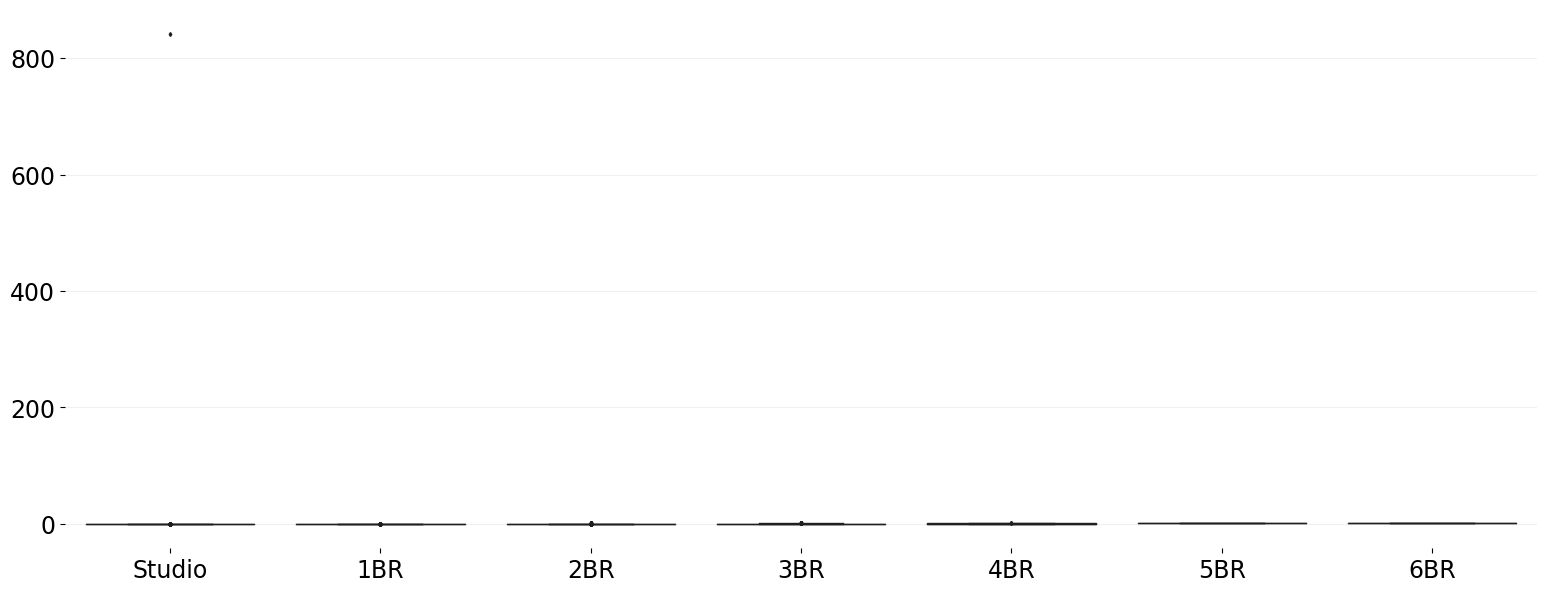

In [19]:
sns.boxplot(x='No_Rooms',y='Annual_Price',data=df_new1, linewidth=1, fliersize=2,palette='Greens')
plt.xticks([i for i in range(7)],labels=['Studio','1BR','2BR','3BR','4BR','5BR','6BR'])
plt.yticks([i for i in range(0,int(10e11),int(2e11))],labels=[0,200,400,600,800],fontsize=17)
plt.xticks([i for i in range(7)],labels=['Studio','1BR','2BR','3BR','4BR','5BR','6BR'],fontsize=17)
plt.xlabel('')
plt.ylabel('',fontsize=17)
plt.show()

An outlier exists in studio apartment. We may need to see the data first whether it should be removed or treated by statistical method

In [20]:
df_new1[df_new1.Annual_Price>1e16]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price


Turns out that the annual price currency is in USD and the annual price has been converted to IDR. There might be an error in the currency column when data inputing. Thus, we will get the value back before conversion

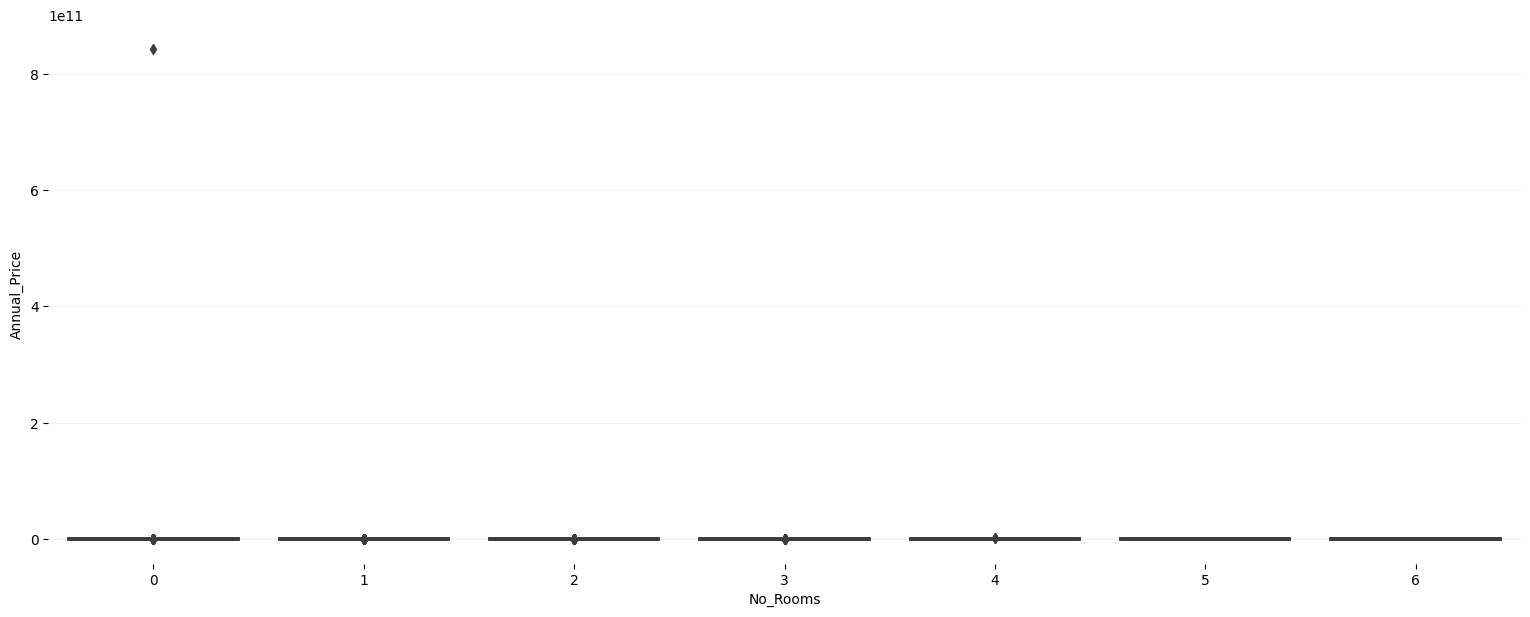

In [21]:
df_new1.loc[df_new1[df_new1.Annual_Price>1e16].index, 'Annual_Price'] = df_new1.loc[df_new1[df_new1.Annual_Price>1e16].index, 'Annual_Price']/15589

sns.boxplot(x='No_Rooms',y='Annual_Price',data=df_new1)
plt.show()

Three and Four no_rooms apartments look having outliers.

In [22]:
df_new1[df_new1.Annual_Price>1e13]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price


From the data above, the values actually are still reasonable when viewed from the area and location ( Jakarta Selatan is known as high society area )

However, for robust result sake in terms of statistics and the limitation of the methods would be used ( MLR and PCA ), this project is limited to the data that is not considered to be extreme outliers. For this reason, we will remove the values above

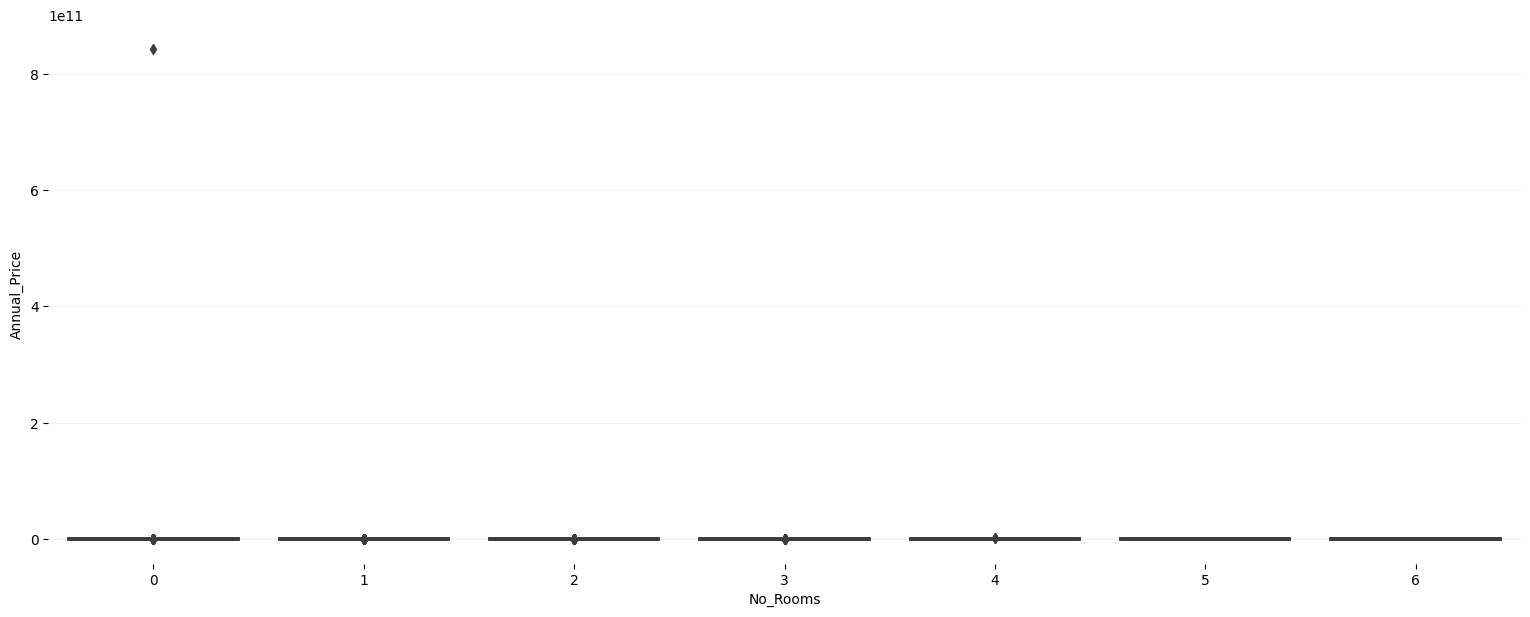

In [23]:
df_new1 = df_new1[df_new1.Annual_Price<1e13]

sns.boxplot(x='No_Rooms',y='Annual_Price',data=df_new1)
plt.show()

Same as the previous reasons, we will remove those values that seem to be considered extreme outliers

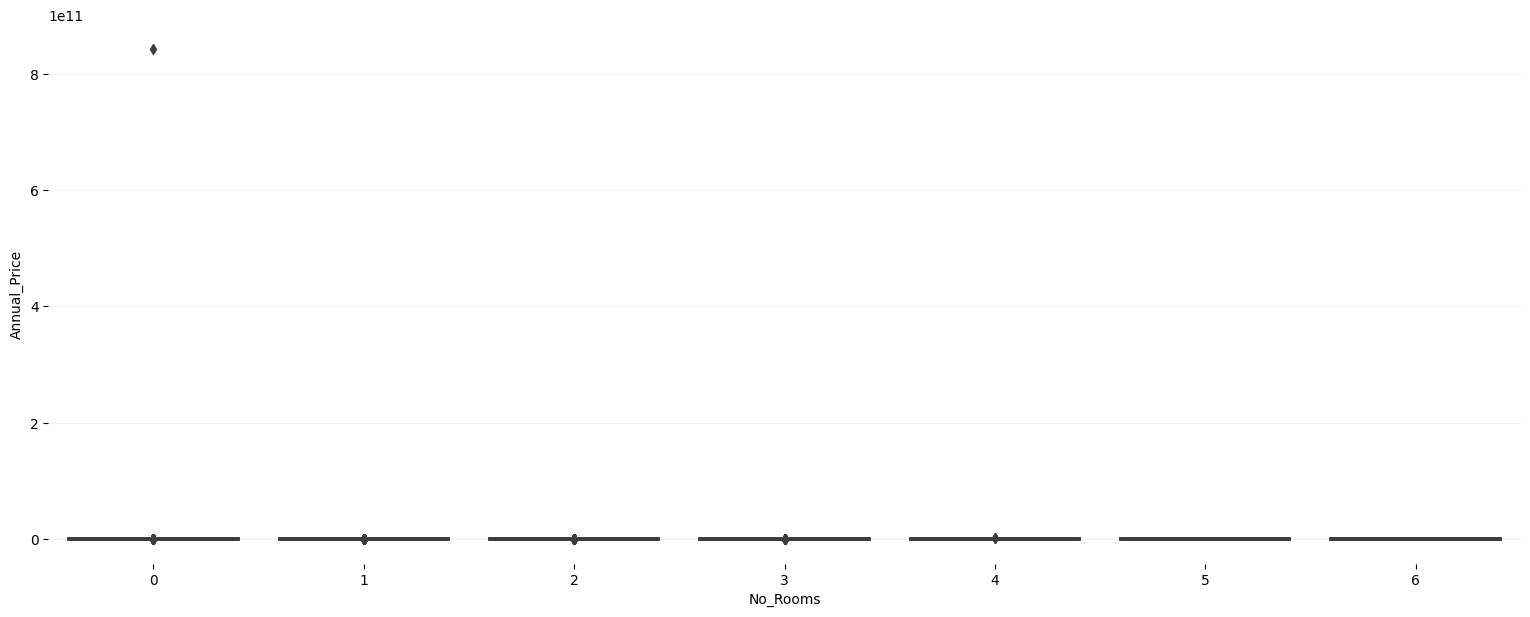

In [24]:
df_new1 = df_new1[df_new1.Annual_Price<0.3e13]

sns.boxplot(x='No_Rooms',y='Annual_Price',data=df_new1)
plt.show()

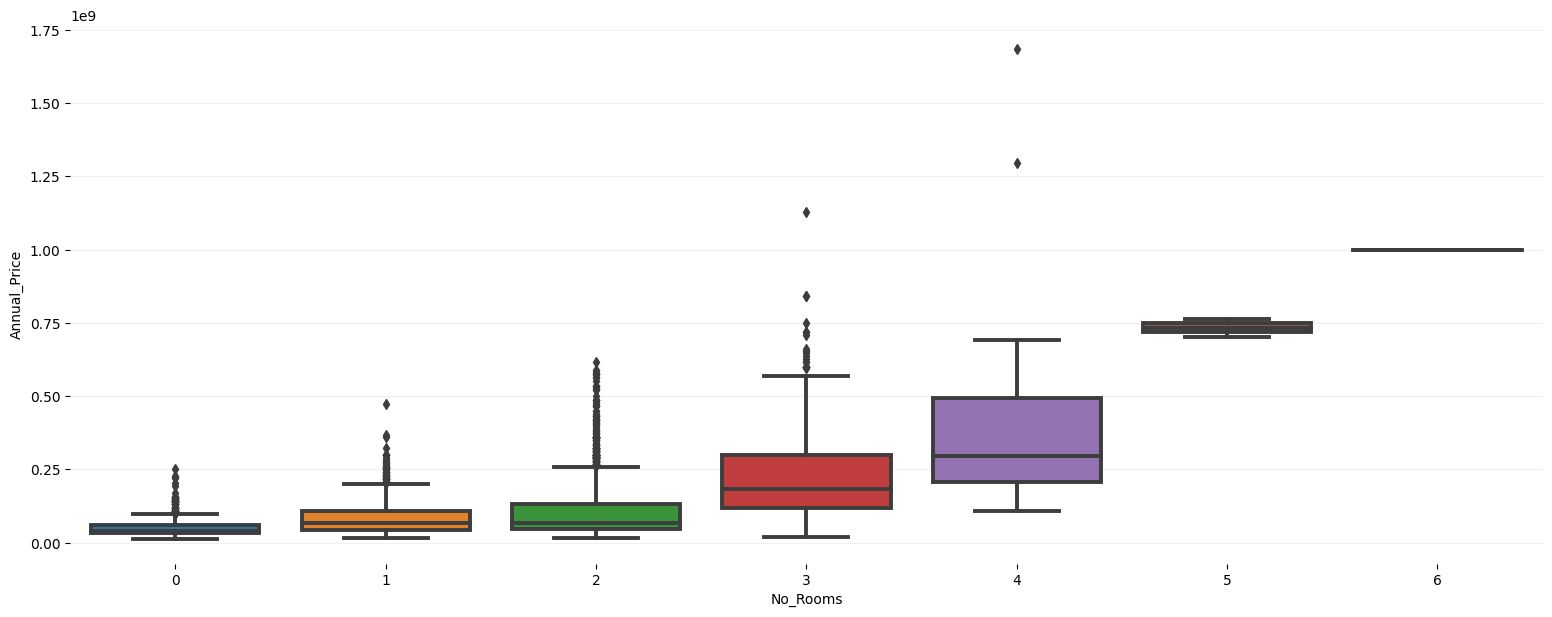

In [25]:
df_new1 = df_new1[df_new1.Annual_Price<8e11]

sns.boxplot(x='No_Rooms',y='Annual_Price',data=df_new1)
plt.show()

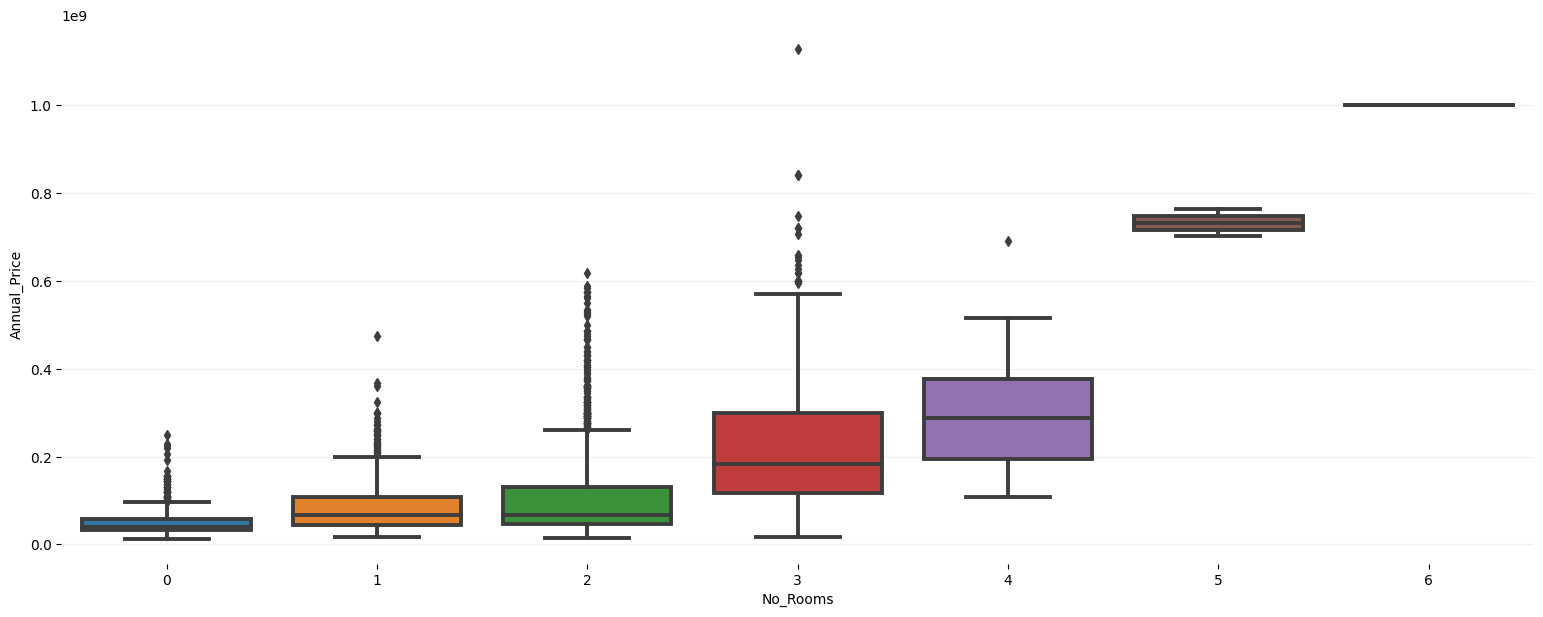

In [26]:
df_new1 = df_new1[df_new1.Annual_Price<1.2e9]

sns.boxplot(x='No_Rooms',y='Annual_Price',data=df_new1)
plt.show()

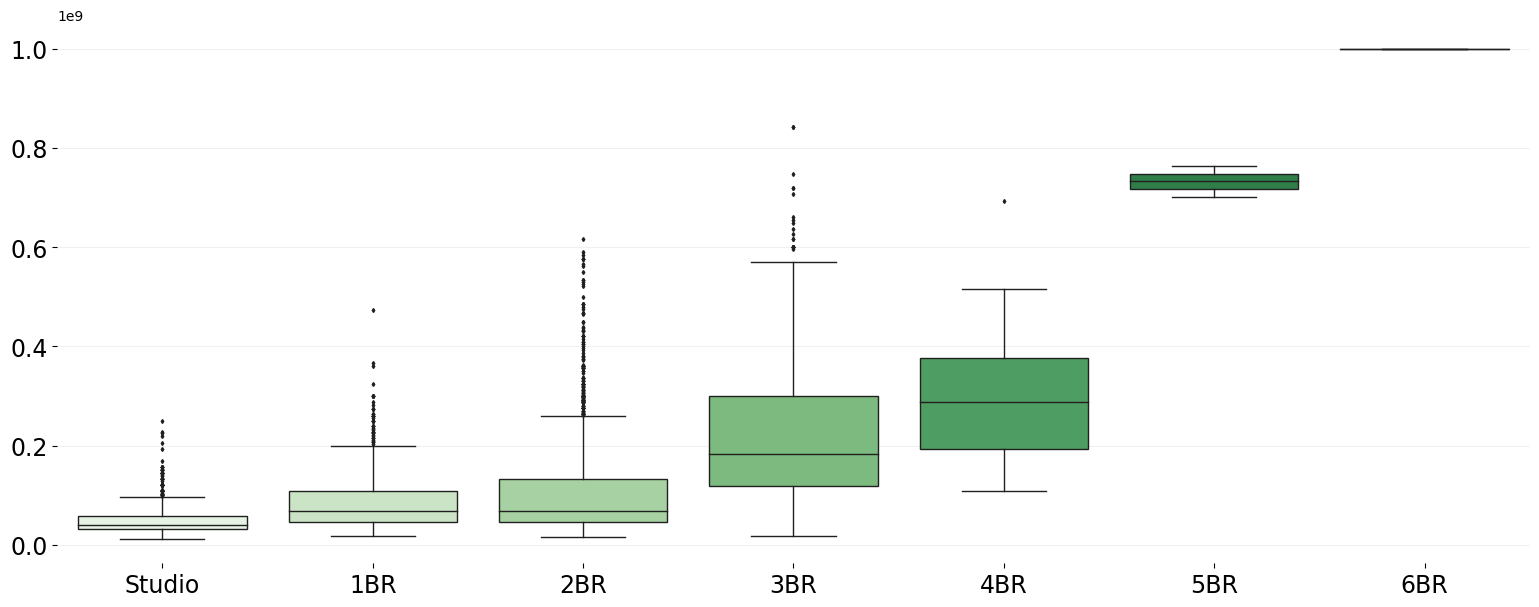

In [27]:
df_new1 = df_new1[~((df_new1.Annual_Price>1e9)&(df_new1.No_Rooms==3))]

sns.boxplot(x='No_Rooms',y='Annual_Price',data=df_new1, linewidth=1, fliersize=2,palette='Greens')
plt.yticks(fontsize=17)
plt.xticks([i for i in range(7)],labels=['Studio','1BR','2BR','3BR','4BR','5BR','6BR'],fontsize=17)
plt.xlabel('')
plt.ylabel('',fontsize=17)
plt.show()

From the boxplot above, it seems that already to make sense for each category of the number of rooms as, overall, the more rooms an apartment has, the more expensive it is

## 2.4.2 Bathroom

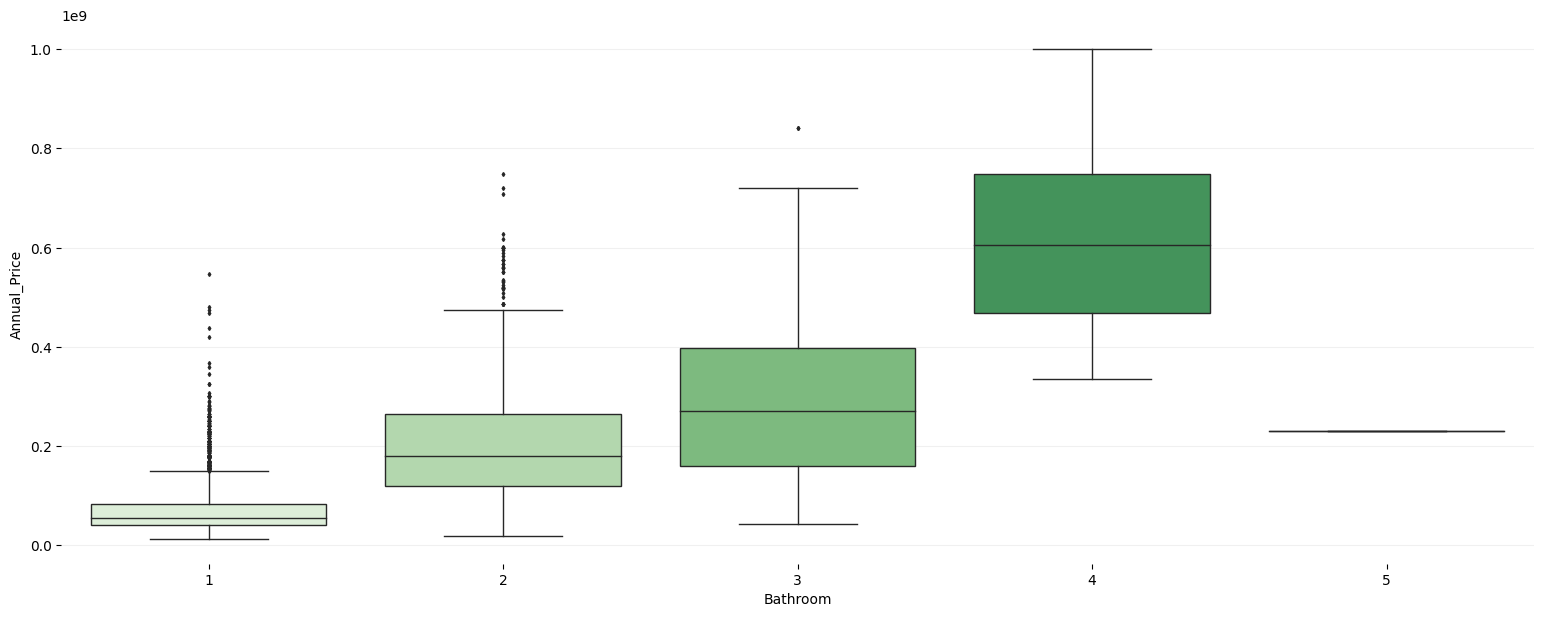

In [28]:
sns.boxplot(x='Bathroom',y='Annual_Price',data=df_new1, linewidth=1, fliersize=2,palette='Greens')
plt.show()

From this column, no extreme outliers exist

## 2.4.3 Longitude and Latitude

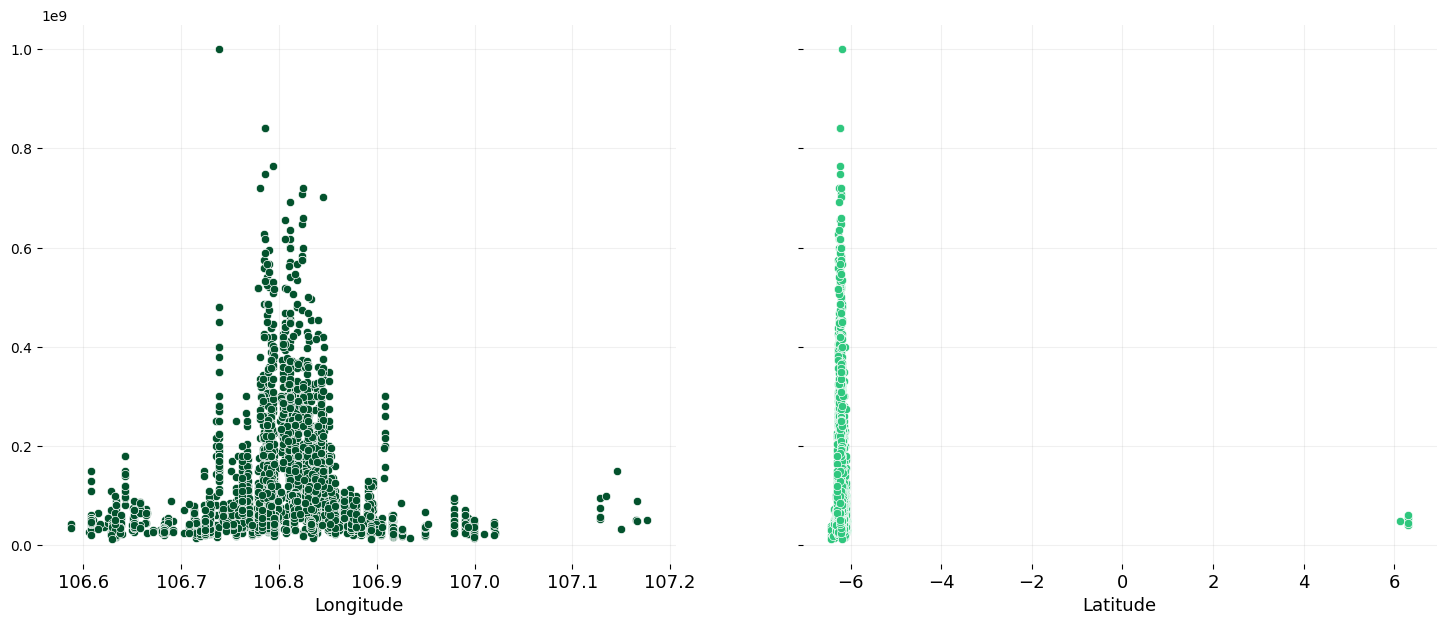

In [29]:
fig, ax = plt.subplots(1,2, figsize= (18,7), sharey=True)

sns.scatterplot(x='Longitude',y='Annual_Price',data=df_new1,ax=ax[0],color=green1)
sns.scatterplot(x='Latitude',y='Annual_Price',data=df_new1,ax=ax[1],color=green2)

ax[0].set_xticklabels(labels=ax[0].get_xticklabels(),fontsize=13)
ax[0].set_xlabel('Longitude',fontsize=13)
# ax[0].set_yticklabels(labels=ax[0].get_yticklabels(),fontsize=13)
ax[0].set_ylabel('')

ax[1].set_xticklabels(labels=ax[1].get_xticklabels(),fontsize=13)
ax[1].set_xlabel('Latitude',fontsize=13)
# ax[1].set_yticklabels(labels=ax[0].get_yticklabels(),fontsize=13)
# ax[1].set_ylabel('')

plt.show()

"Latitude" column has some unusual values which close to 6 as the most are exist near negative 6

In [30]:
df_new1[df_new1.Latitude > 6]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
826,Best Western Mangga Dua Studio View City,0,1,Mangga Dua,Jakarta Pusat,106.827261,6.139958,1,33.0,Tower 1,18,IDR,48000000
951,B Residence BSD 1BR Tower lotus,0,1,BSD City,Tangerang,106.638100,6.304300,1,26.0,Tower lotus,20,IDR,40000000
1140,B Residence BSD Studio Non Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,0,20.0,Tower Rose,17,IDR,40000000
2344,B Residence BSD Studio Fully Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,25.0,Tower Tulip,20,IDR,55000000
3143,B Residence BSD Studio Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,25.0,Tower Tulip,18,IDR,55000000
3175,B Residence BSD Studio View AEON Mall,0,1,BSD City,Tangerang,106.638100,6.304300,1,22.0,Tower Tulip,18,IDR,45000000
4469,B Residence BSD Studio Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,26.0,Tower Tulip,19,IDR,60000000


There are mistaken in those values. Tangerang and Jakarta Pusat should be having negative values Latitude based upon https://www.latlong.net/place.html

Thus, we're gonna reverse them into negative

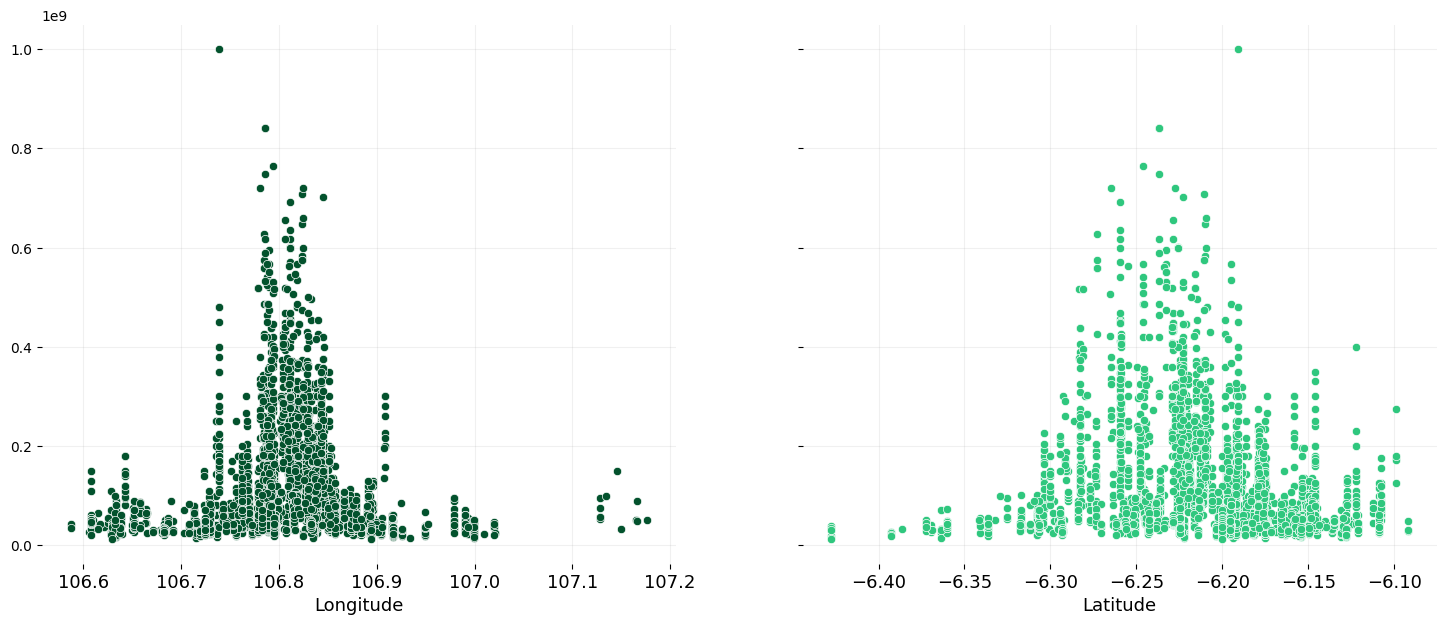

In [31]:
df_new1.loc[df_new1[df_new1.Latitude > 6].index, 'Latitude'] = -df_new1.loc[df_new1[df_new1.Latitude > 6].index, 'Latitude']


fig, ax = plt.subplots(1,2, figsize= (18,7), sharey=True)

sns.scatterplot(x='Longitude',y='Annual_Price',data=df_new1,ax=ax[0],color=green1)
sns.scatterplot(x='Latitude',y='Annual_Price',data=df_new1,ax=ax[1],color=green2)

ax[0].set_xticklabels(labels=ax[0].get_xticklabels(),fontsize=13)
ax[0].set_xlabel('Longitude',fontsize=13)
# ax[0].set_yticklabels(labels=ax[0].get_yticklabels(),fontsize=13)
ax[0].set_ylabel('')

ax[1].set_xticklabels(labels=ax[1].get_xticklabels(),fontsize=13)
ax[1].set_xlabel('Latitude',fontsize=13)
plt.show()

The values, as shown from the graphs above, seem already reasonable and there is no extreme outliers

## 2.4.4 Area and Total Facilities

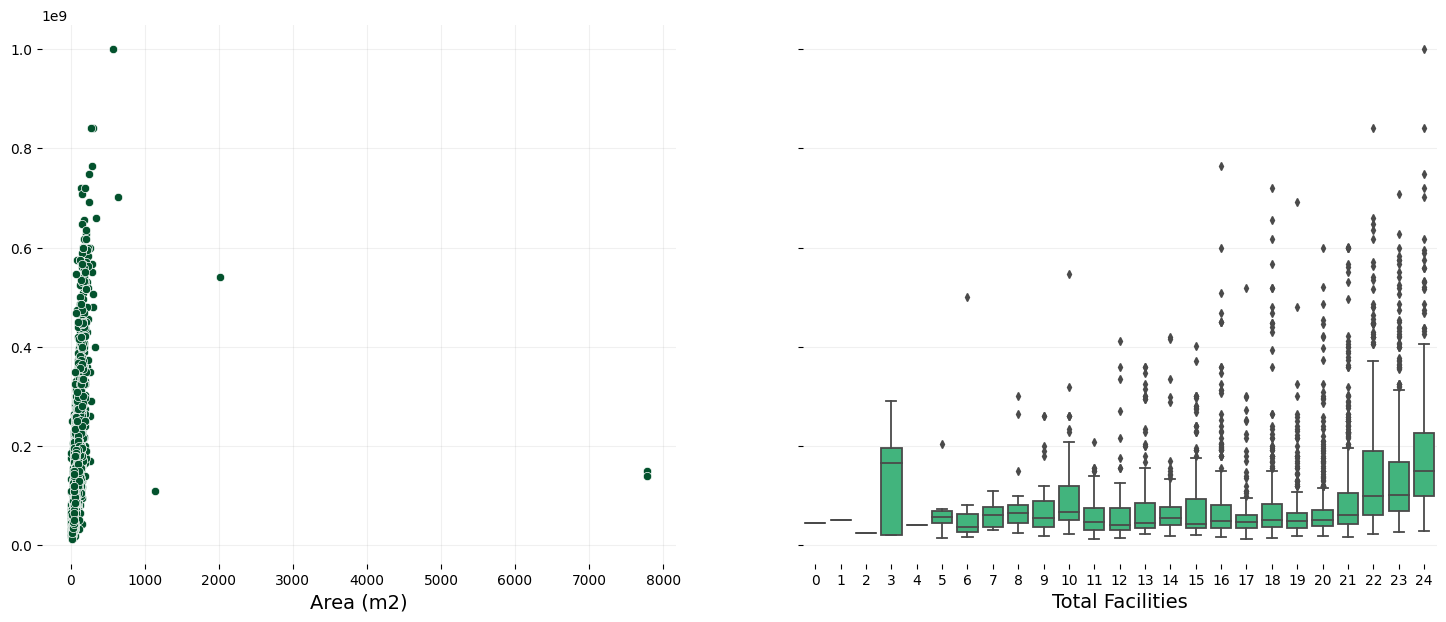

In [32]:
fig, ax = plt.subplots(1,2, figsize= (18,7), sharey=True)

sns.scatterplot(x='Area',y='Annual_Price',data=df_new1,ax=ax[0], color=green1)
sns.boxplot(x='Total_Facilities',y='Annual_Price',data=df_new1,ax=ax[1],color=green2, linewidth=1.3, fliersize=4)

ax[0].set_xlabel('Area (m2)', fontsize=14)
ax[1].set_xlabel('Total Facilities', fontsize=14)
ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.show()

There are some extreme outliers in area column. They have more than 7000m2, but considered cheaper than others. Thus, we're gonna remove them.

On the other hand, the total facilities have some unusual values. For example like in six total facilities, there is an apartment having high price relative to its peers

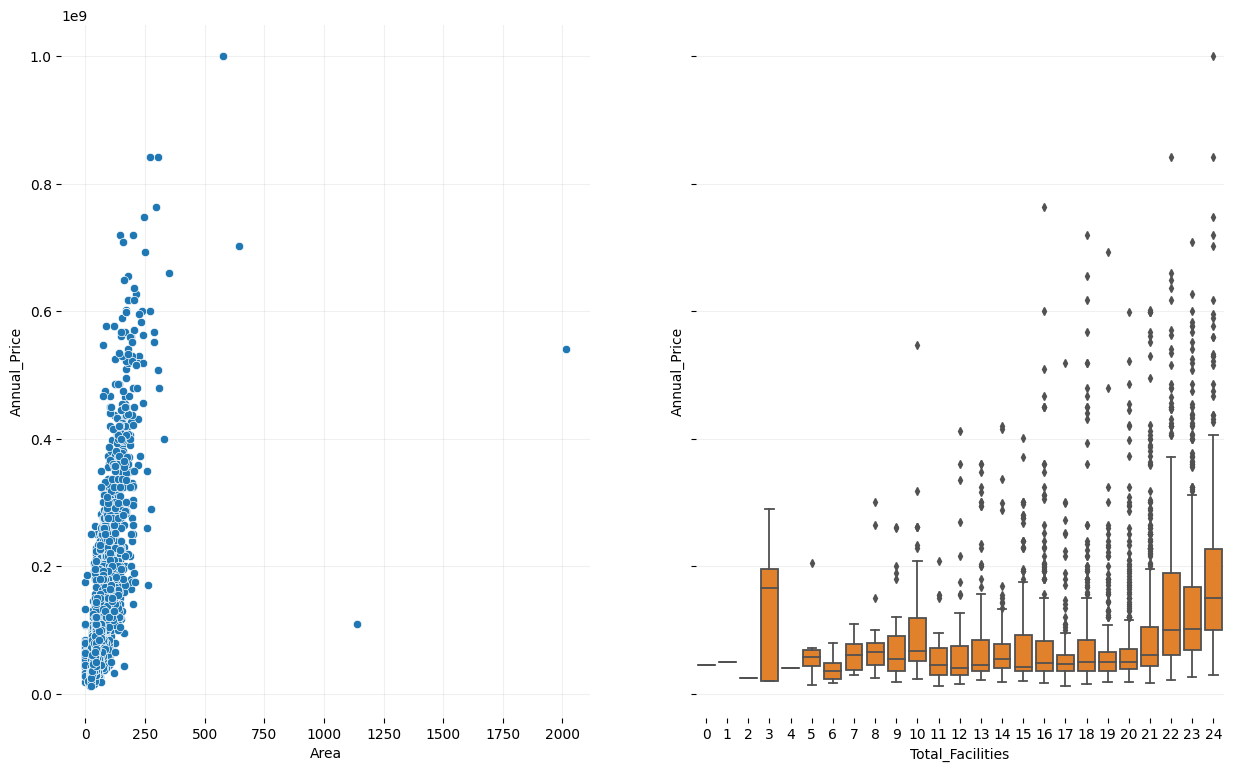

In [33]:
df_new1 = df_new1[df_new.Area<7000]
df_new1 = df_new1[~((df_new1.Total_Facilities==6)&(df_new1.Annual_Price>0.4e9))]

fig, ax = plt.subplots(1,2, figsize= (15,9), sharey=True)

sns.scatterplot(x='Area',y='Annual_Price',data=df_new1,ax=ax[0])
sns.boxplot(x='Total_Facilities',y='Annual_Price',data=df_new1,ax=ax[1],color='tab:orange', linewidth=1.3, fliersize=4)
plt.show()

There are still some outliers in Area column. Let's take a look at first before we handle them for those who having more han 500m2. 

And for the total facilities, we're also gonna check the value that has 10 total facilities with price more than Rp400,000,000

In [34]:
outliers1 = pd.concat([df_new1[df_new1.Area>500],df_new1[(df_new1.Total_Facilities==10)&(df_new1.Annual_Price>0.4e9)]])


Actually, the values above still reasonable except for "Maqna Residence 3+1BR Tower 1" in index 5019. However, again, for the robust result sake since we're gonna use PCA and Multiple Linear Regression which are sensitive to the outliers, we will take down all of the values above except for index 3611

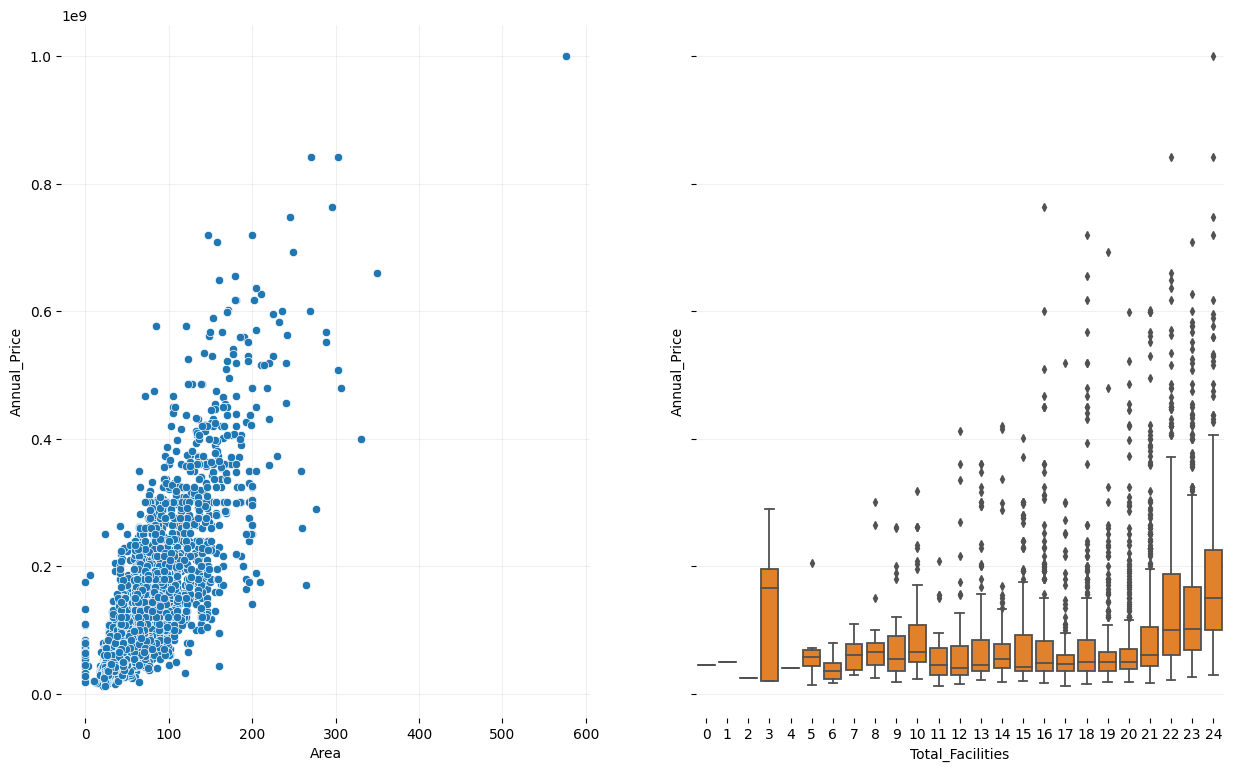

In [35]:
df_new1 = df_new1.drop(index=[743,4802,5019,4812])

fig, ax = plt.subplots(1,2, figsize= (15,9), sharey=True)

sns.scatterplot(x='Area',y='Annual_Price',data=df_new1,ax=ax[0])
sns.boxplot(x='Total_Facilities',y='Annual_Price',data=df_new1,ax=ax[1],color='tab:orange', linewidth=1.3, fliersize=4)
plt.show()


From the left graph above, seems there are apartments that have zero area which means doesn't make any sense

In [36]:
df_new1[df_new1.Area==0]


,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
244,Menteng Square Apartment 1BR Semi Furnished,1,1,Menteng,Jakarta Pusat,106.851858,-6.200232,1,0.0,Tower C,14,IDR,43300000
270,Puri Orchard Apartment 2BR View City,2,1,Cengkareng,Jakarta Barat,106.729326,-6.166036,1,0.0,Tower OG B,19,IDR,60000000
528,Madison Park Studio Non Furnished,0,1,Tanjung Duren,Jakarta Barat,106.788741,-6.178919,0,0.0,Tower Magnolia,16,IDR,27000000
536,Green Lake Sunter Apartment 1 BR Fully Furnished,1,1,Sunter,Jakarta Utara,106.875949,-6.144770,1,0.0,Tower slatan,20,IDR,55000000
550,Mediterania Garden Residence 2 2BR Fully Furni...,2,1,Tanjung Duren,Jakarta Barat,106.788166,-6.175894,1,0.0,Tower K,23,IDR,60000000
558,Green Bay Pluit Apartment 3BR View city,3,2,Pluit,Jakarta Utara,106.779326,-6.107877,1,0.0,Tower K,21,IDR,175000000
797,Green Palm Residence 2BR Fully Furnished,2,1,Duri Kosambi,Jakarta Barat,106.715409,-6.174903,1,0.0,Tower B,19,IDR,30000000
810,Puri Orchard Apartment 2BR View City,2,1,Cengkareng,Jakarta Barat,106.729326,-6.166036,1,0.0,Tower OG,20,IDR,55000000
933,Bintaro Park View 2BR Tower B,2,1,Bintaro,Jakarta Selatan,106.759213,-6.258118,1,0.0,Tower B,20,IDR,55000000
1171,Sudirman Park Apartment 2BR Fully Furnished,2,1,Sudirman,Jakarta Pusat,106.818029,-6.205971,1,0.0,Tower B,24,IDR,84000000


In this issue, I hypothesize that an error occurred while entering the data.

In [37]:
df_new1[df_new1.Area==0].shape

(31, 13)

In addition, since the total number of zero area apartments is only 31, we can fill in manually to get the most accurate possible value by checking through the internet.

*Otherwise, if the number is big enough that would be taking a lot of time, we may use statistical methods instead*

In [38]:
df_new1.loc[244, 'Area'] = 27
df_new1.loc[270, 'Area'] = 21
df_new1.loc[528, 'Area'] = 18.16
df_new1.loc[536, 'Area'] = 42
df_new1.loc[550, 'Area'] = 44
df_new1.loc[558, 'Area'] = 60
df_new1.loc[797, 'Area'] = 36
df_new1.loc[810, 'Area'] = 21
df_new1.loc[933, 'Area'] = (38+22)/2
df_new1.loc[1171, 'Area'] = 48
df_new1.loc[1393, 'Area'] = 33
df_new1.loc[1420, 'Area'] = 82
df_new1.loc[1464, 'Area'] = 70
df_new1.loc[1694, 'Area'] = 42
df_new1.loc[1718, 'Area'] = 50
df_new1.loc[1793, 'Area'] = 40
df_new1.loc[2026, 'Area'] = 38
df_new1.loc[2067, 'Area'] = 36
df_new1.loc[2724, 'Area'] = 92
df_new1.loc[3318, 'Area'] = 38
df_new1.loc[3643, 'Area'] = 44
df_new1.loc[4315, 'Area'] = 49
df_new1.loc[4352, 'Area'] = 42
df_new1.loc[861, 'Area'] = 40
df_new1.loc[1044, 'Area'] = 39
df_new1.loc[1402, 'Area'] = 66
df_new1.loc[2810, 'Area'] = 22
df_new1.loc[4425, 'Area'] = 30
df_new1.loc[4433, 'Area'] = 35

df_new1.drop(index=[977,1243],inplace=True) #Both of these apartments are nowhere to be found on the internet

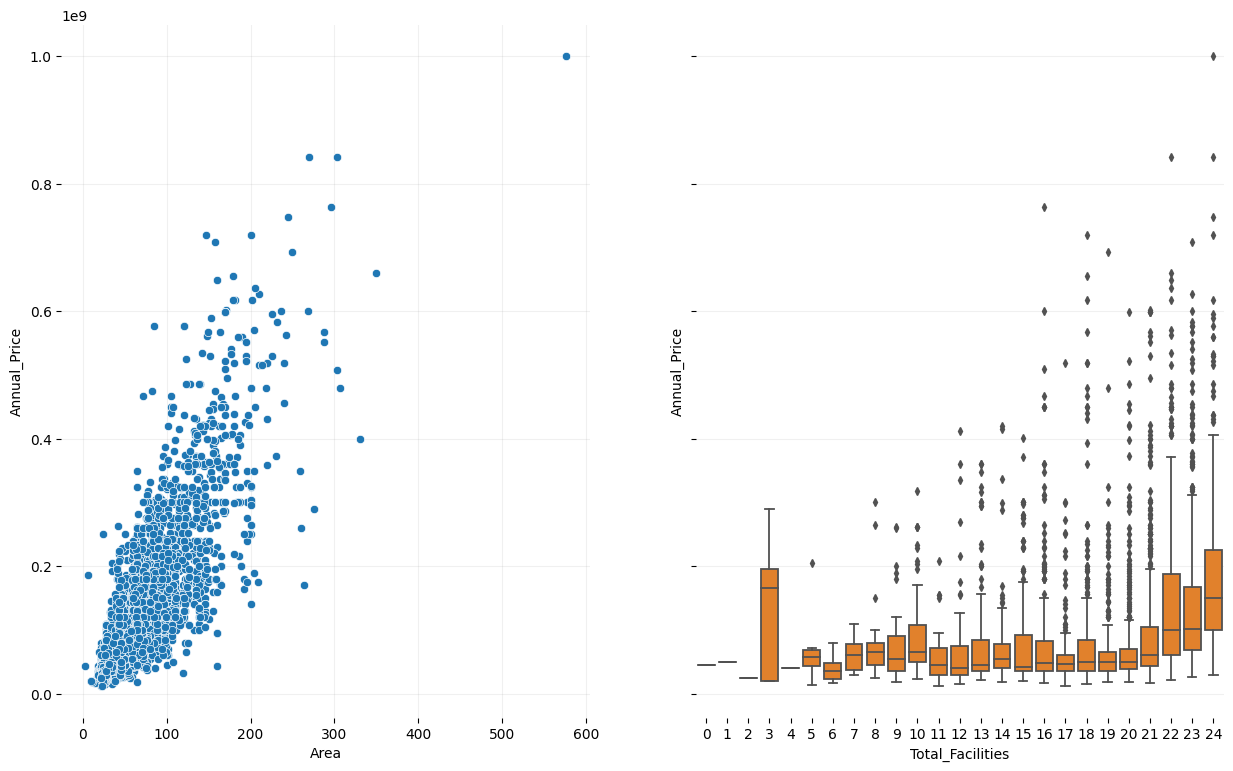

In [39]:
fig, ax = plt.subplots(1,2, figsize= (15,9), sharey=True)

sns.scatterplot(x='Area',y='Annual_Price',data=df_new1,ax=ax[0])
sns.boxplot(x='Total_Facilities',y='Annual_Price',data=df_new1,ax=ax[1],color='tab:orange', linewidth=1.3, fliersize=4)
plt.show()

In [40]:
df_new1[df_new1.Area<=10]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
2482,Lavenue Apartment 2BR Fully Furnished,2,2,Pancoran,Jakarta Selatan,106.842971,-6.248050,1,6.0,Tower North,22,IDR,186000000
3632,Kalibata City Green Palace Studio Tower Nusa I...,0,1,Kalibata,Jakarta Selatan,106.849866,-6.257697,1,3.0,Tower Nusa Indah,24,IDR,43200000
898,Aeropolis 2 Apartment 1BR View city,1,1,Cengkareng,Tangerang,106.632900,-6.128300,0,10.0,Tower Residence 3,3,IDR,19600000
2137,Aeropolis 2 Apartment 1BR Non Furnished,1,1,Cengkareng,Tangerang,106.632900,-6.128300,0,10.0,Tower Residence 3,3,IDR,19600000
4576,Aeropolis 2 Apartment 1BR Tower Residence 3,1,1,Cengkareng,Tangerang,106.632900,-6.128300,0,10.0,Tower Residence 3,3,IDR,19600000


In [41]:
df_new1.loc[2482, 'Area'] = 106
df_new1.loc[3632, 'Area'] = 21

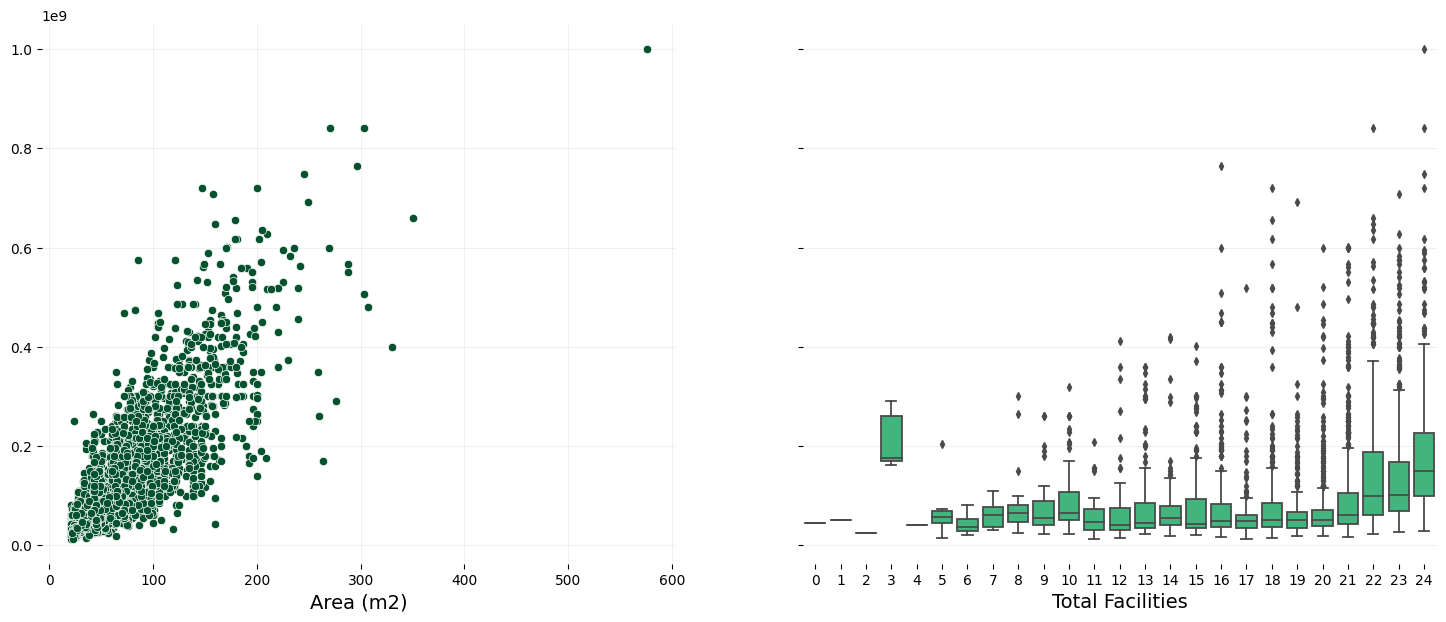

In [42]:
df_new1 = df_new1[df_new1['Area']>20]

fig, ax = plt.subplots(1,2, figsize= (18,7), sharey=True)

sns.scatterplot(x='Area',y='Annual_Price',data=df_new1,ax=ax[0], color=green1)
sns.boxplot(x='Total_Facilities',y='Annual_Price',data=df_new1,ax=ax[1],color=green2, linewidth=1.3, fliersize=4)
ax[0].set_xlabel('Area (m2)', fontsize=14)
ax[1].set_xlabel('Total Facilities', fontsize=14)
ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.show()

## 2.4.5 Furnished

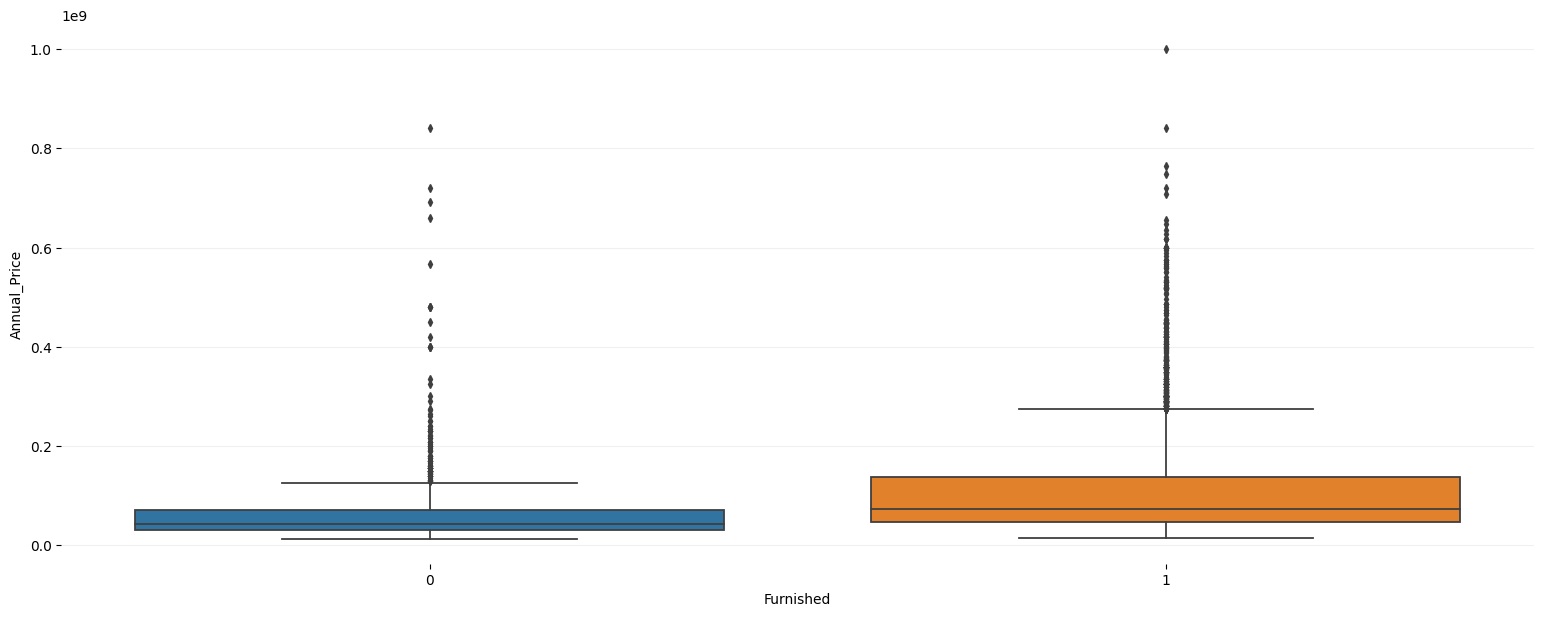

In [43]:
sns.boxplot(x='Furnished',y='Annual_Price',data=df_new1, linewidth=1.3, fliersize=4)
plt.show()

# 3. Feature Engineering

## 3.1 Create New feature for representing Latitude and Longitude by using Clustering method

In [44]:
df_cluster = df_new1[['Longitude','Latitude','Annual_Price']]
df_cluster.sample(6)

,Longitude,Latitude,Annual_Price
421,106.873191,-6.187929,53000000
199,106.789934,-6.178351,90000000
2624,106.818351,-6.208956,196000000
1971,106.788342,-6.174634,42000000
1066,106.731913,-6.136260,42400000
4627,106.850690,-6.146146,120000000


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [46]:
scaler = StandardScaler()
df_cluster_new = scaler.fit_transform(df_cluster)
df_cluster_new = pd.DataFrame(df_cluster_new,columns=df_cluster.columns,index=df_cluster.index)

In [47]:
inertia = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_cluster_new)
    inertia.append(kmeans.inertia_)

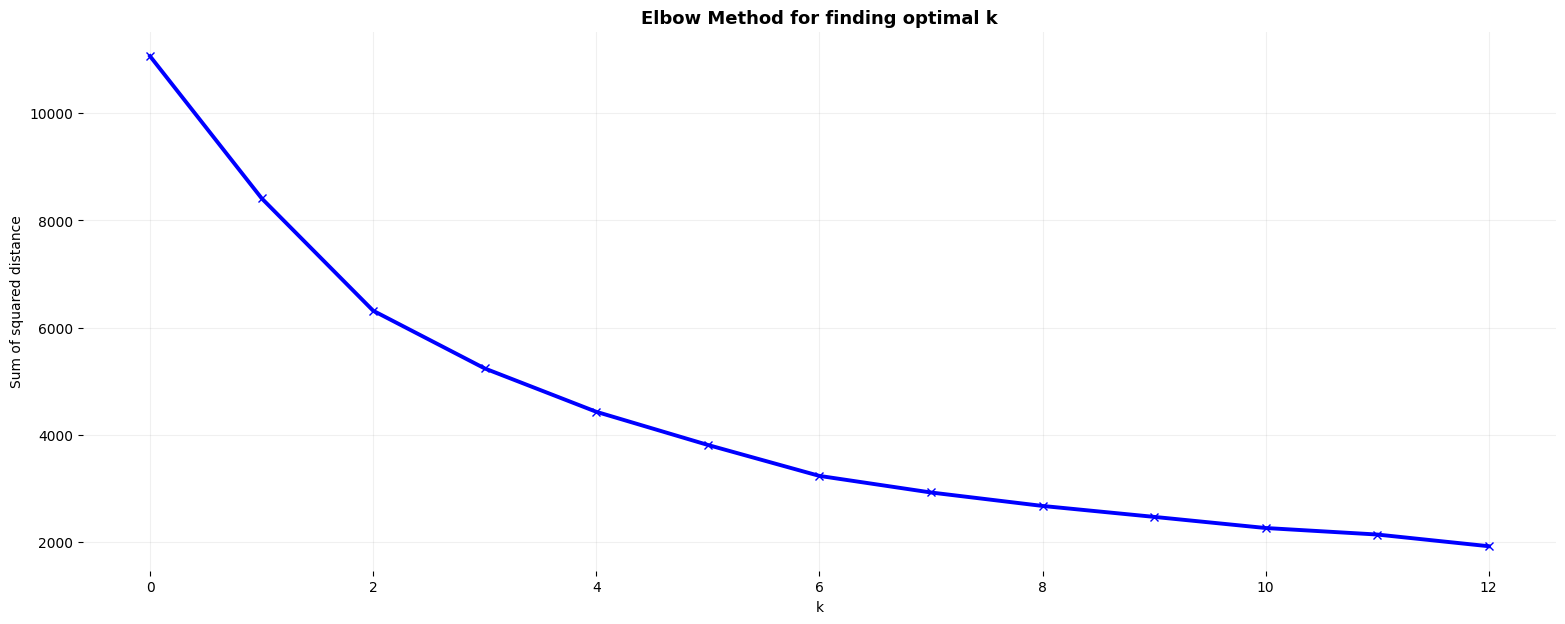

In [48]:
plt.plot(inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method for finding optimal k')
plt.show()

In [49]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_cluster_new)

KMeans(n_clusters=3, random_state=0)

In [50]:
df_cluster_new['cluster'] = kmeans.labels_
df_cluster_new.head(20)

,Longitude,Latitude,Annual_Price,cluster
0,0.114402,-0.431827,-0.083042,1
1,-0.834207,0.301363,-0.745775,0
2,-0.810303,0.421717,-0.344118,0
3,-0.405155,-1.409760,4.736836,2
4,-0.232927,1.117649,-0.725692,0
5,0.926713,0.389557,-0.444532,0
6,0.579671,1.214977,-0.243704,0
7,-0.001450,-1.128035,1.362922,2
8,0.605664,-1.081070,-0.591137,1
9,0.926713,0.389557,-0.715651,0


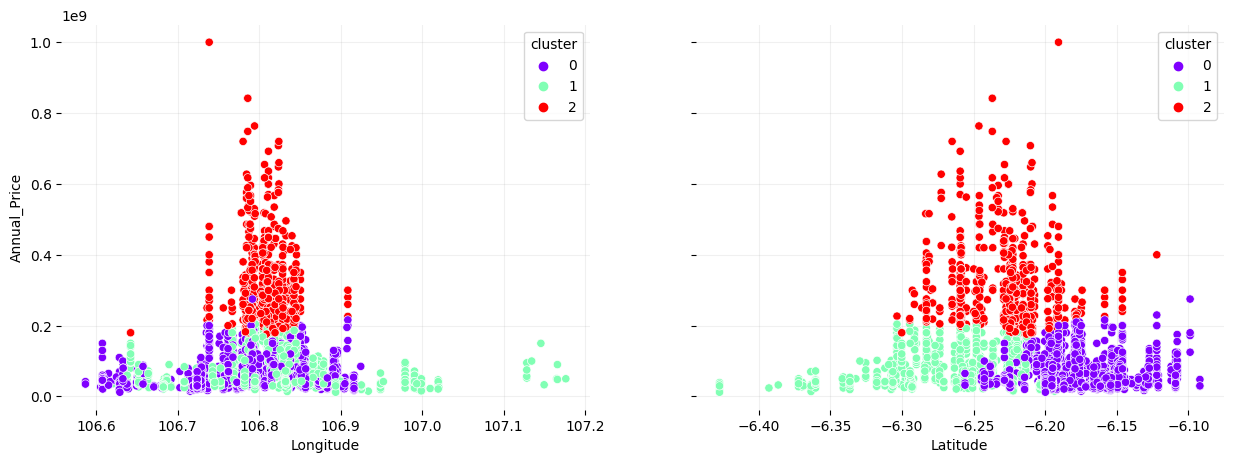

In [51]:
fig, ax = plt.subplots(1,2, figsize= (15,5), sharey=True)

sns.scatterplot(x=df_new1['Longitude'], y=df_new1['Annual_Price'],ax=ax[0], hue=df_cluster_new['cluster'], palette='rainbow')
sns.scatterplot(x=df_new1['Latitude'], y=df_new1['Annual_Price'],hue=df_cluster_new['cluster'], palette='rainbow')
plt.show()

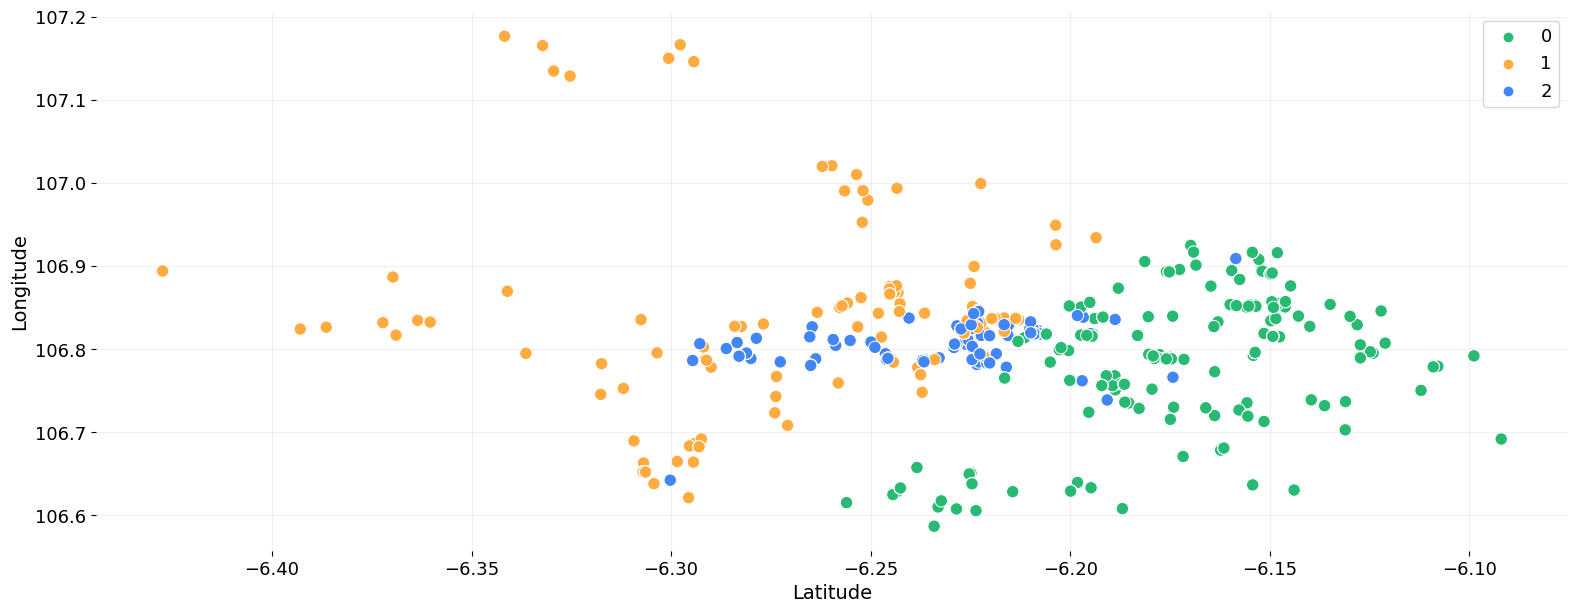

In [52]:
sns.scatterplot(x=df_new1['Latitude'], y=df_new1['Longitude'], hue=df_cluster_new['cluster'],s=80, palette=['#28ba73ff','#ffab40ff','#4285f4ff'])

plt.xlabel('Latitude',size=14)
plt.xticks(size=13)
plt.ylabel('Longitude',size=14)
plt.yticks(size=13)
plt.legend(fontsize=13)
plt.show()

- Cluster 0 = North area and slight west apartments that have quite affordable prices relative to others ( Sunter, Daan Mogot, Kebon Jeruk, Tanah Abang, Senen, etc )
- Cluster 1 = South area and slight east apartments that have quite affordable prices relative to others ( Cikarang, Bekasi, Margonda, Kebagusan, Cawang, Ciputat )
- Cluster 2 = Pricy apartments and most of them located in the middle of distribution longitude and latitude ( Kemang, Pondok Indah, SCBD, Cilandak, BSD City, etc )

In [53]:
df_new1['cluster'] = df_cluster_new['cluster']
df_new1.sample(6)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,cluster
1268,Hamptons Park Apartment 3BR Fully Furnished,3,2,Pondok Indah,Jakarta Selatan,106.791409,-6.282965,1,121.0,Tower A,24,IDR,309000000,2
441,Woodland Park Residence Kalibata Studio View city,0,1,Kalibata,Jakarta Selatan,106.855352,-6.255809,1,28.0,Tower 1,22,IDR,72000000,1
2030,ST Moritz Apartment 4BR Fully Furnished,4,3,Puri Indah,Jakarta Barat,106.738730,-6.190723,1,259.0,Tower Ambassador,24,IDR,350000000,2
332,Lavenue Apartment 2BR View City,2,2,Pancoran,Jakarta Selatan,106.842971,-6.248050,1,122.0,Tower South,22,IDR,240000000,2
1466,Tree Park City 1BR View City,1,1,Cikokol,Tangerang,106.628500,-6.214400,1,65.0,Tower -,13,IDR,110000000,0
553,Puri Park View Apartment Studio Fully Furnished,0,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,1,23.0,Tower AAA,19,IDR,31000000,0


# 4. Data Insights and Exploration

## 4.1 Average annual rent price by Locality and Region

In [54]:
locality = df_new1.groupby('Locality').mean()['Annual_Price'].sort_values(ascending=False).to_frame().reset_index()
region = df_new1.groupby('Region').mean()['Annual_Price'].sort_values(ascending=False).to_frame().reset_index()

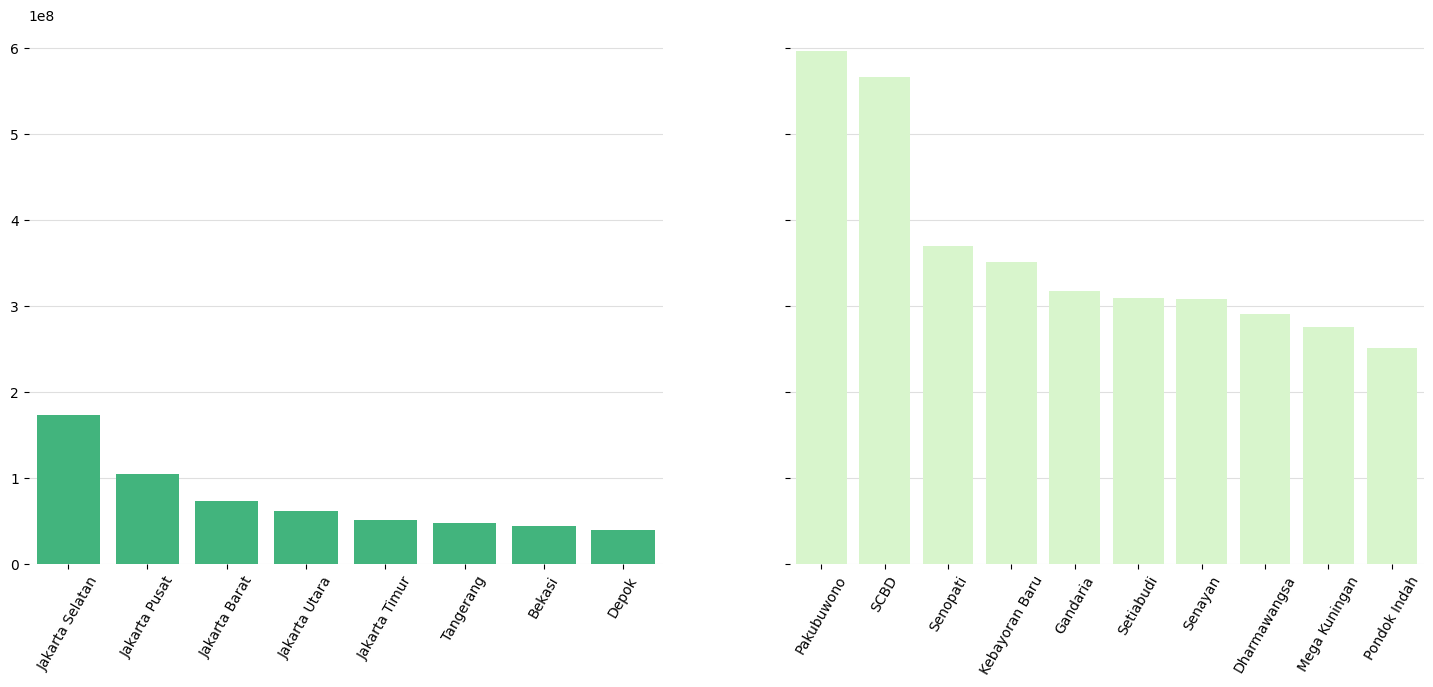

In [55]:
rcParams['grid.alpha'] = 0.4
fig, ax = plt.subplots(1,2, figsize= (18,7), sharey=True)

sns.barplot(x='Region',y='Annual_Price',data=region,ax=ax[0], color=green2)
sns.barplot(x='Locality',y='Annual_Price',data=locality.head(10),ax=ax[1],color=green3)
ax[0].set_xlabel('', fontsize=14)
ax[1].set_xlabel('', fontsize=14)
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=60)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=60)


plt.show()

In [56]:
df_new1.groupby('Furnished').mean()['Annual_Price'].to_frame().reset_index()

,Furnished,Annual_Price
0,0,6.697925e+07
1,1,1.114730e+08


In [57]:
df_new1.groupby('Bathroom').mean()['Annual_Price'].to_frame().reset_index()

,Bathroom,Annual_Price
0,1,7.088041e+07
1,2,2.052008e+08
2,3,2.917821e+08
3,4,6.125200e+08
4,5,2.300000e+08


In [58]:
df_new1.groupby('No_Rooms').mean()['Annual_Price'].to_frame().reset_index()

,No_Rooms,Annual_Price
0,0,4.976983e+07
1,1,8.525823e+07
2,2,1.031547e+08
3,3,2.235375e+08
4,4,3.150438e+08
5,5,7.636000e+08
6,6,1.000000e+09


In [59]:
df_new1[df_new1['Bathroom']==5]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,cluster
1191,Ancol Mansion Apartment 4BR Semi Furnished,4,5,Ancol,Jakarta Utara,106.845853,-6.122102,0,160.0,Tower -,23,IDR,230000000,0


In [60]:
df_new1[df_new1['Bathroom']==4]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,cluster
793,Kemang Village Apartment 4+1BR Tower Cosmopolitan,4,4,Kemang,Jakarta Selatan,106.811453,-6.259374,1,240.0,Tower Cosmopolitan,22,IDR,456000000,2
1865,La Maison Barito Apartment 5+1BR View City,5,4,Kebayoran Baru,Jakarta Selatan,106.794400,-6.246300,1,296.0,Tower Apartement,16,IDR,763600000,2
3611,ST Moritz Apartment 6BR Fully Furnished,6,4,Puri Indah,Jakarta Barat,106.738730,-6.190723,1,576.0,Tower Ambassador,24,IDR,1000000000,2
4296,Essence Darmawangsa Apartment 3+1BR Fully Furn...,3,4,Dharmawangsa,Jakarta Selatan,106.804426,-6.258746,1,168.0,Tower Eminence 1,22,IDR,336000000,2
4389,Nirvana Residence 4BR Tower Ebony,4,4,Kemang,Jakarta Selatan,106.814773,-6.265249,1,303.0,Tower Ebony,23,IDR,507000000,2


In [61]:
df_new1[df_new1['No_Rooms']==5]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,cluster
1865,La Maison Barito Apartment 5+1BR View City,5,4,Kebayoran Baru,Jakarta Selatan,106.7944,-6.2463,1,296.0,Tower Apartement,16,IDR,763600000,2


## 4.2 Average annual rent price by Total Facilities

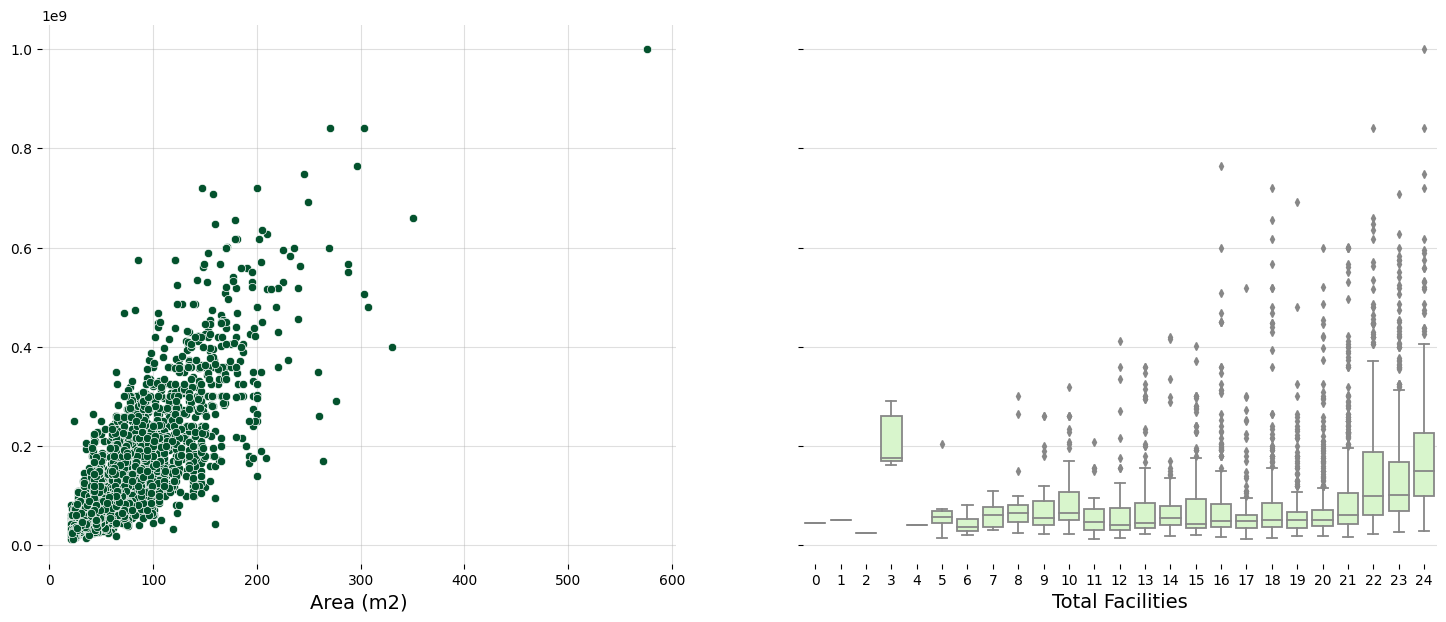

In [62]:
fig, ax = plt.subplots(1,2, figsize= (18,7), sharey=True)

sns.scatterplot(x='Area',y='Annual_Price',data=df_new1,ax=ax[0], color=green1)
sns.boxplot(x='Total_Facilities',y='Annual_Price',data=df_new1,ax=ax[1],color=green3, linewidth=1.3, fliersize=4)

ax[0].set_xlabel('Area (m2)', fontsize=14)
ax[1].set_xlabel('Total Facilities', fontsize=14)
ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.show()

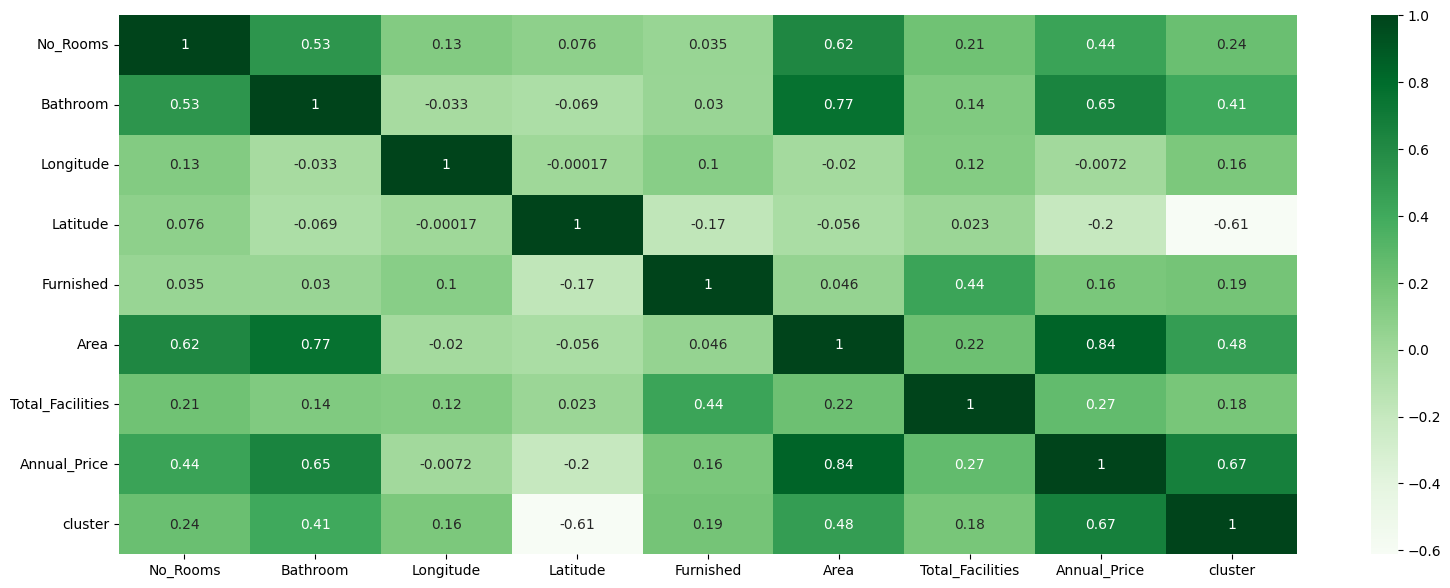

In [63]:
sns.heatmap(df_new1.corr(), annot=True, cmap='Greens')

plt.show()

In [64]:
df_new1[df_new1['Total_Facilities']==3].to_csv('Total Fasilitas.csv')

# 5. Perform Factor Analysis

Factor Analysis is a method for grouping various independent variables if we assume that there is a relationship between these independent variables

In [65]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo, FactorAnalyzer
from sklearn.preprocessing import StandardScaler

**Uji Hipotesis Bartlett Sphericity**

In [66]:
df_num1 = df_new1[df_new1['Currency']=='IDR'].select_dtypes(exclude='object').drop(['Longitude','Latitude'],axis=1)
scaler = StandardScaler()
df_num = scaler.fit_transform(df_num1.drop('Annual_Price',axis=1))
df_num = pd.DataFrame(df_num,columns=df_num1.drop('Annual_Price',axis=1).columns)

- Hypothesis 0: No 'factor' can be formed from the independent variables in our data
- Hypothesis alternative: There is 'factor' that can be formed from the independent variables of our data
- p-value = 0, meaning we can reject the 0 hypothesis. This means that there is 'factor' that can be formed from the independent variables in our data.

In [67]:
chi2,p = calculate_bartlett_sphericity(df_num)
print("Bartlett Sphericity Test")
print("Chi squared value : ",chi2)
print("p value : ",p)

Bartlett Sphericity Test
Chi squared value :  9783.519418822949
p value :  0.0


**Uji KMO (KAISER-MEYER-OLKIN)**

KMO is a test conducted to determine the appropriateness of a factor analysis to be carried out. The KMO test scale ranges from 0 to 1. If the calculated KMO value is lower than 0.5, then factor analysis is not feasible. Meanwhile, if the calculated KMO value is greater than 0.5, then factor analysis is feasible

In [68]:
kmo_all,kmo_model = calculate_kmo(df_num)
print("KMO Test Statisitc",kmo_model)

KMO Test Statisitc 0.6971794448428269


In [69]:
fa = FactorAnalyzer(rotation=None,n_factors=3)
fa.fit(df_num)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [70]:
ev,_ = fa.get_eigenvalues()

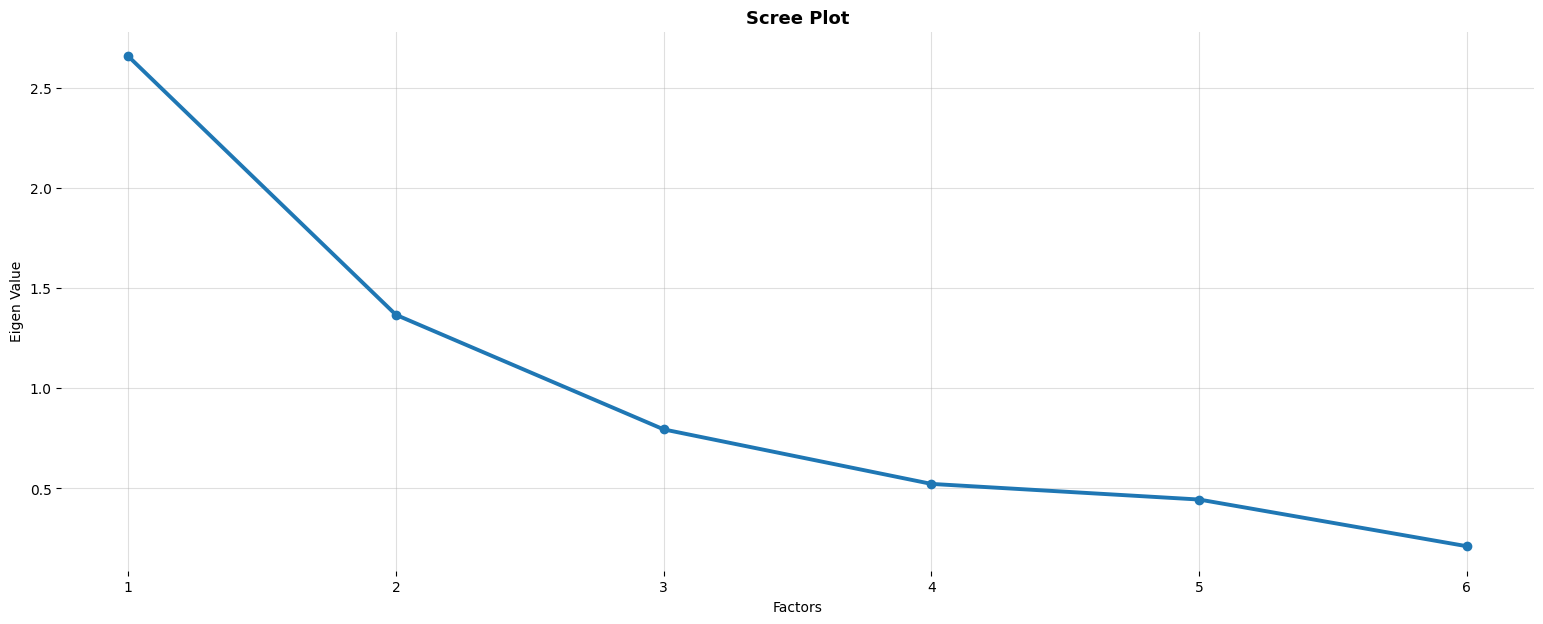

In [71]:
plt.scatter(range(1,df_num.shape[1]+1),ev)
plt.plot(range(1,df_num.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid(True)

In [72]:
fa = FactorAnalyzer(n_factors=3)
fa.fit(df_num)
pd.DataFrame(fa.loadings_,index=df_num.columns)

,0,1,2
No_Rooms,0.692763,0.062510,-0.090569
Bathroom,0.764217,-0.062954,0.108767
Furnished,-0.083122,0.445060,0.122181
Area,0.902060,-0.013527,0.109894
Total_Facilities,0.159596,1.011281,-0.189889
cluster,0.075009,0.012768,0.831010


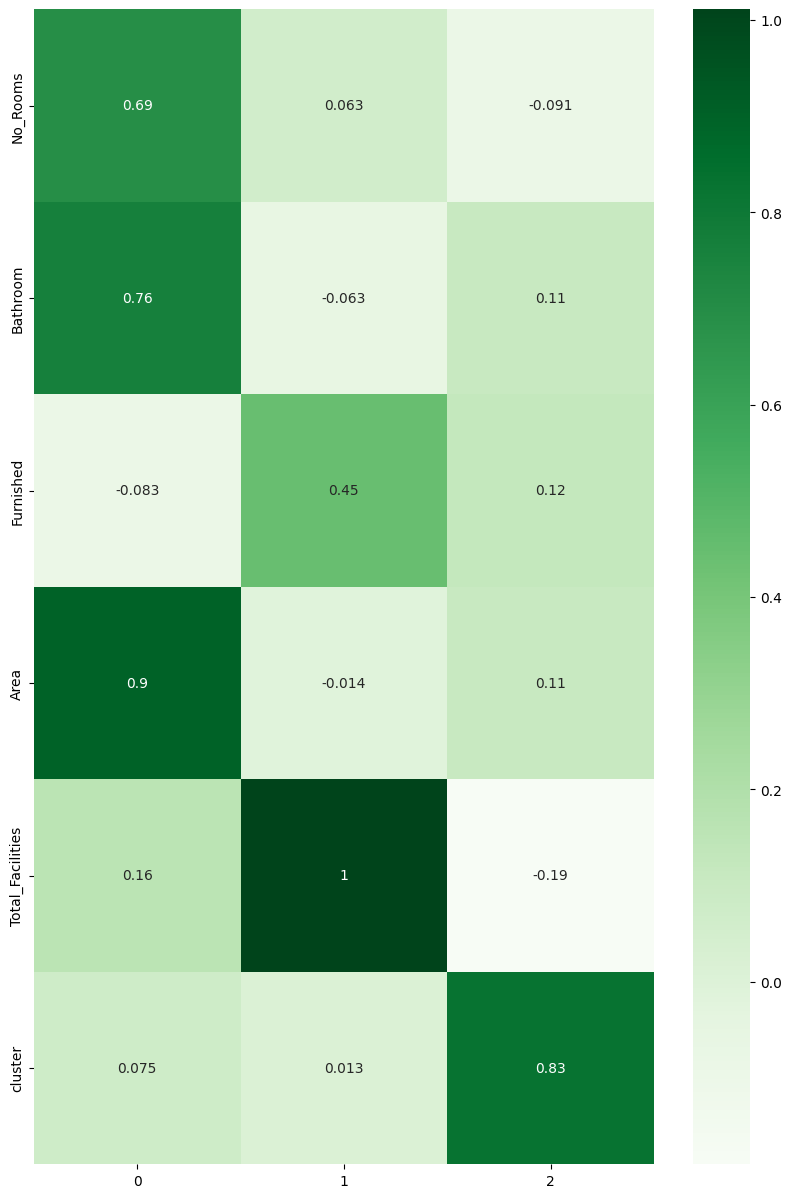

In [94]:
plt.subplots(figsize=(10,15))
sns.heatmap(pd.DataFrame(fa.loadings_,index=df_num.columns),cmap='Greens',annot=True)
plt.show()

In [74]:
pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])

,0,1,2
Variance,1.915665,1.228986,0.773674
Proportional Var,0.319278,0.204831,0.128946
Cumulative Var,0.319278,0.524108,0.653054


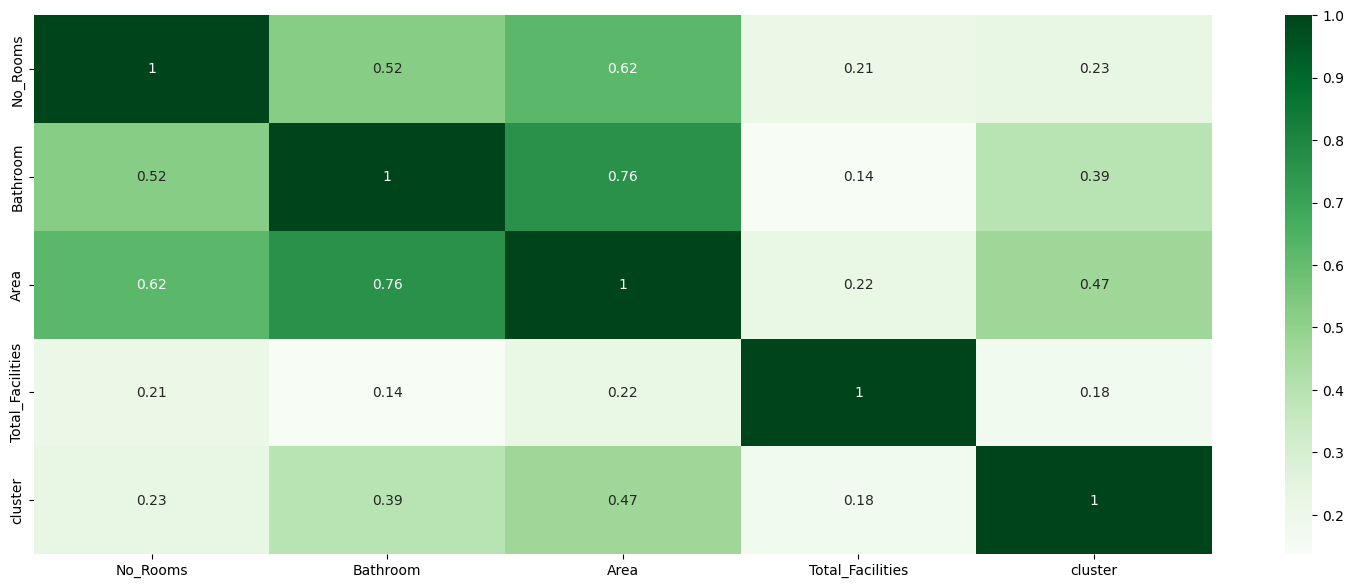

In [95]:
sns.heatmap(pd.DataFrame(df_num.drop('Furnished',axis=1).corr(),index=df_num.drop('Furnished',axis=1).columns),cmap='Greens',annot=True)
plt.show()

In [76]:
X = pd.DataFrame(fa.transform(df_num),columns=['Main_Features','Amenities','Location'],index=df_num.index)
df_cleaned = pd.concat([X,df_num1.Annual_Price.reset_index(drop=True)],axis=1)
df_cleaned.drop(index=[3120,3263],inplace=True)

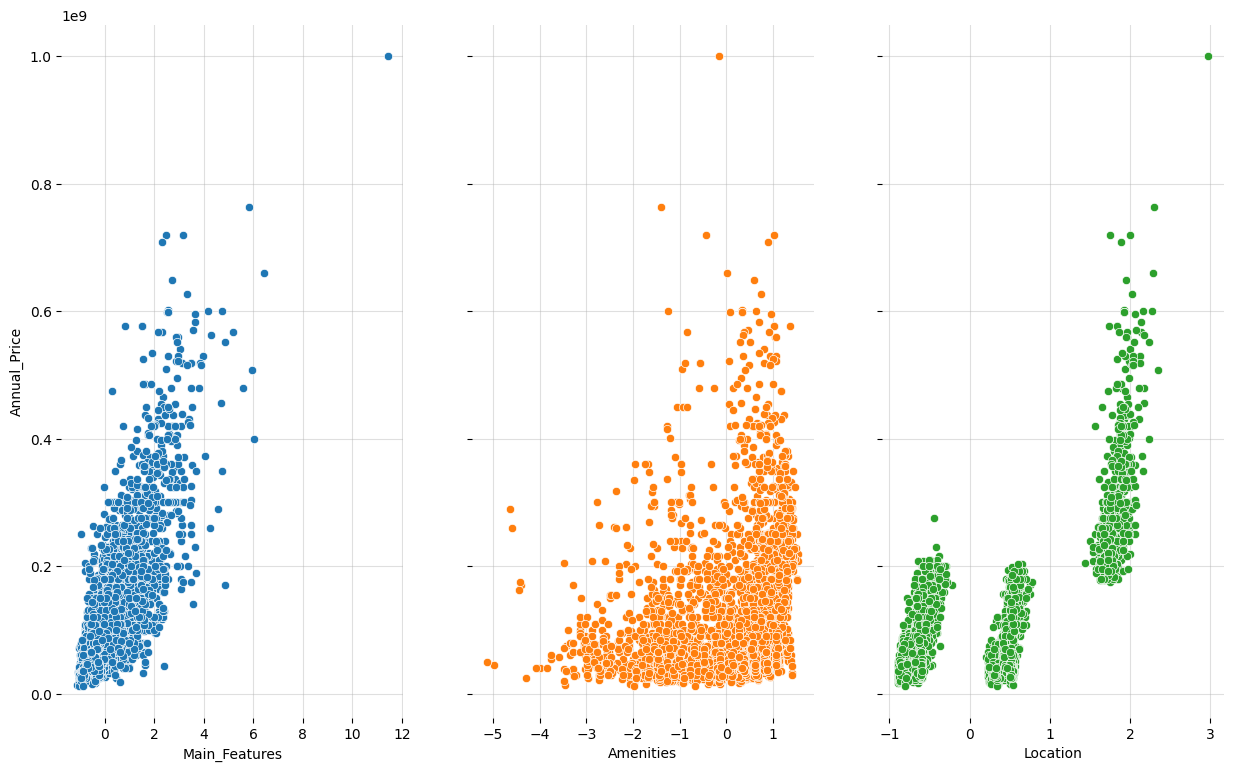

In [77]:
fig, ax = plt.subplots(1,3, figsize= (15,9), sharey=True)

sns.scatterplot(x='Main_Features',y='Annual_Price',data=df_cleaned,ax=ax[0])
sns.scatterplot(x='Amenities',y='Annual_Price',data=df_cleaned,ax=ax[1],color='tab:orange')
sns.scatterplot(x='Location',y='Annual_Price',data=df_cleaned,ax=ax[2],color='tab:green')
plt.show()

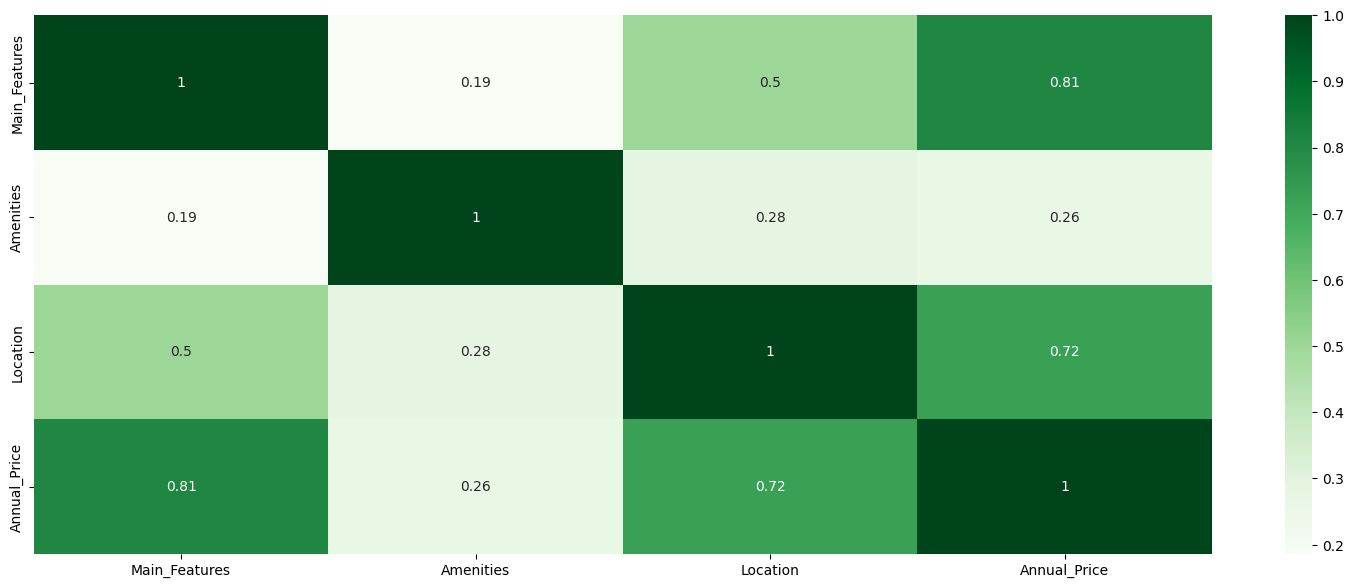

In [96]:
sns.heatmap(df_cleaned.corr(),cmap='Greens',annot=True)
plt.show()

# 4. Perform Linear Regression

## 4.1 Model Diagnostic and Checking Assumptions

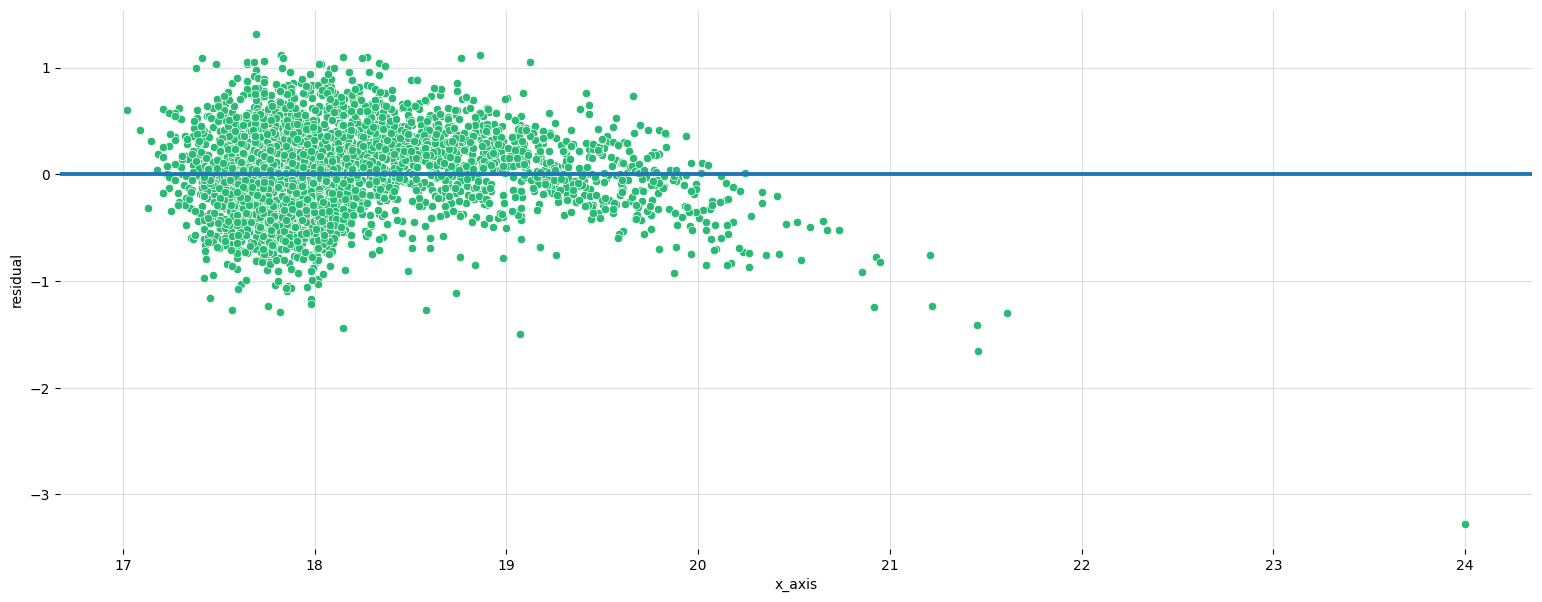

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_cleaned, df_test = train_test_split(df_cleaned, test_size = 0.2, random_state=0)

lr = LinearRegression()
lr.fit(df_cleaned.drop(['Annual_Price'],axis=1),np.log(df_cleaned.Annual_Price))
# 
# calculate residuals
predicted_values = lr.predict(df_cleaned.drop(['Annual_Price'],axis=1))
residual = np.log(df_cleaned.Annual_Price) - predicted_values

#preprocess shape

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': predicted_values,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual",color='#29ba74ff')
plt.axhline(0,color='tab:blue')
plt.show()

### 4.1.1 Linearity

From the residual plot above, there is no non-linear pattern exists. Thus, linearity assumption is met

### 4.1.2 Normality

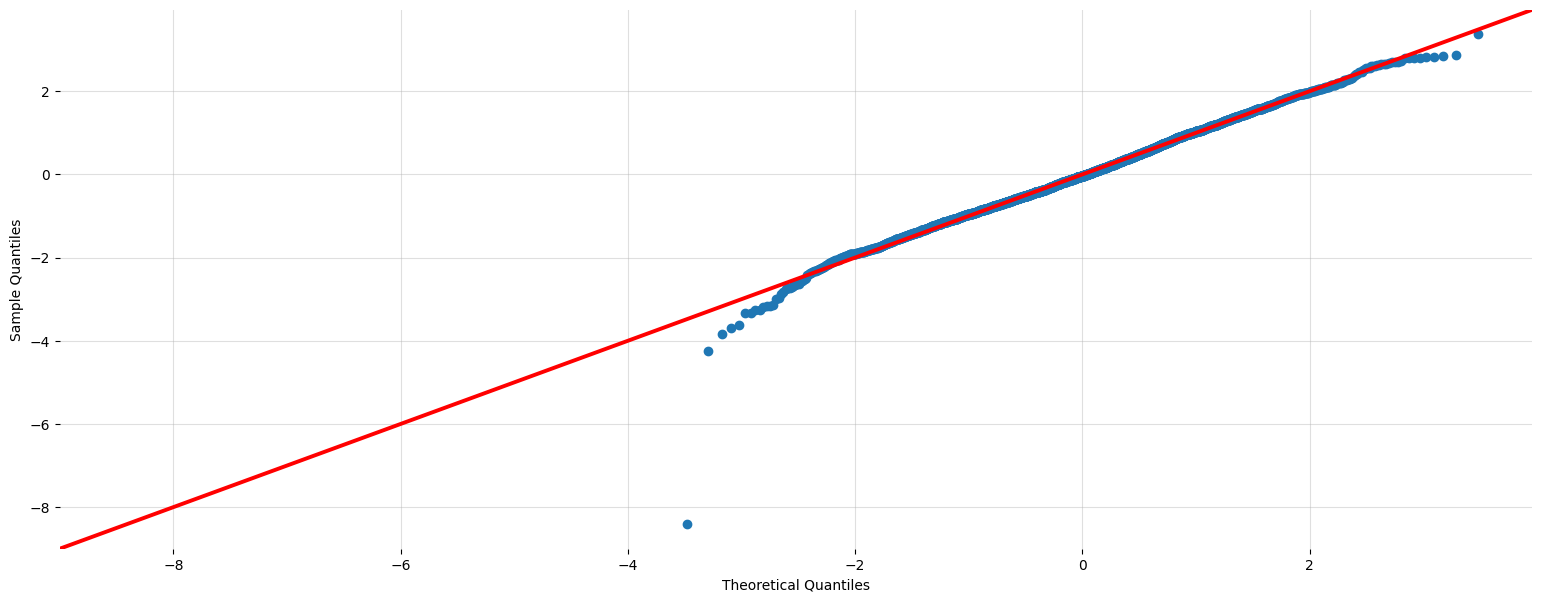

In [80]:
# QQplot
from sklearn.preprocessing import StandardScaler



std_resid = StandardScaler().fit_transform(residual[(residual>-0.7e8)&(residual<0.7e8)].values.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

In [81]:
from scipy.stats import jarque_bera, bartlett


jarque_bera(std_resid)

Jarque_beraResult(statistic=264.1904388412595, pvalue=0.0)

Since the p-value is more than 0.05, then it can be concluded that normality assumption is met

### 4.1.3 Heteroscedasticity

In [82]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

X = df_cleaned.drop('Annual_Price',axis=1)

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X)
lzip(name, test)

[('F statistic', 0.9773091398867064), ('p-value', 0.6961006758577613)]

Since the p-value is more than 0.05, then it can be concluded that heteroscedasticity assumption is met

In [83]:
import statsmodels.api as sm

X = sm.add_constant(df_cleaned.drop(['Annual_Price'],axis=1))
model = sm.OLS(np.log(df_cleaned.Annual_Price), X)
results = model.fit()

In [84]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Annual_Price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     3377.
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:31:42   Log-Likelihood:                -1908.8
No. Observations:                4007   AIC:                             3826.
Df Residuals:                    4003   BIC:                             3851.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            18.1384      0.006   2945.268      0.000      18.126      18.151
Main_Features     0.4428      0.007     59.744      0.000       0.428       0.457
Amenities         0.1056      0.007     16.138      0.000       0.093       0.118
Location          0.2747      0.008     32.900      0.000       0.258       0.291
==============================================================================
Omnibus:                      116.192   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.190
Skew:                          -0.133   Prob(JB):                     4.28e-58
Kurtosis:                       4.230   Cond. No.                         1.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.1.4 Independence

From the summary result above, the value of Durbin-Watson closes to 2. Therefore, it implies that Independence assumption is met

## 4.2 Cross Validation

In [85]:
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()
X = df_cleaned.drop('Annual_Price',axis=1)
y = np.log(df_cleaned.Annual_Price)

cv_results = (-cross_val_score(linreg, X,y, cv=5,scoring='neg_mean_squared_error',n_jobs=-1))
cv_results1 = (cross_val_score(linreg, X,y, cv=5,scoring='r2',n_jobs=-1))

In [86]:
pd.DataFrame(np.sqrt(cv_results),columns=['Root Mean Squared Error'])

,Root Mean Squared Error
0,0.391725
1,0.405874
2,0.370528
3,0.372141
4,0.412389


In [87]:
print('The average of RMSE from 5 cross validation',np.sqrt(cv_results).mean())
print('The standard deviation of RMSE from 5 cross validation',np.sqrt(cv_results).std())

The average of RMSE from 5 cross validation 0.39053120064015406
The standard deviation of RMSE from 5 cross validation 0.017046554102353794


In [88]:
pd.DataFrame(cv_results1,columns=['R-Squared'])

,R-Squared
0,0.738278
1,0.682165
2,0.739741
3,0.736905
4,0.672339


In [89]:
print('The average of R-Squared from 5 cross validation',cv_results1.mean())
print('The standard deviation of R-Squared from 5 cross validation',cv_results1.std())

The average of R-Squared from 5 cross validation 0.7138856736190002
The standard deviation of R-Squared from 5 cross validation 0.03008568349035817


## 4.3 Testing the model

In [90]:
X_train = df_cleaned.drop('Annual_Price',axis=1)
y_train = np.log(df_cleaned.Annual_Price)
X_test = df_test.drop('Annual_Price',axis=1)
y_test = np.log(df_test.Annual_Price)

In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [97]:
from sklearn.metrics import mean_squared_error, r2_score

def scores(model, name):
    test_val = y_test.values.tolist()
    prediction = model.predict(X_test)    
        
    sns.scatterplot(x=test_val, y=prediction,color=green2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    score = pd.Series({'Model':name,
              'RMSE_train': mean_squared_error(y_train, model.predict(X_train)),
              'RMSE_test': mean_squared_error(y_test, model.predict(X_test)),
              'R2_train': r2_score(y_train, model.predict(X_train)),
              'R2_test': r2_score(y_test, model.predict(X_test))
             })
    return score

Model         Linear Regression
RMSE_train             0.151808
RMSE_test              0.142345
R2_train               0.716808
R2_test                0.725067
dtype: object

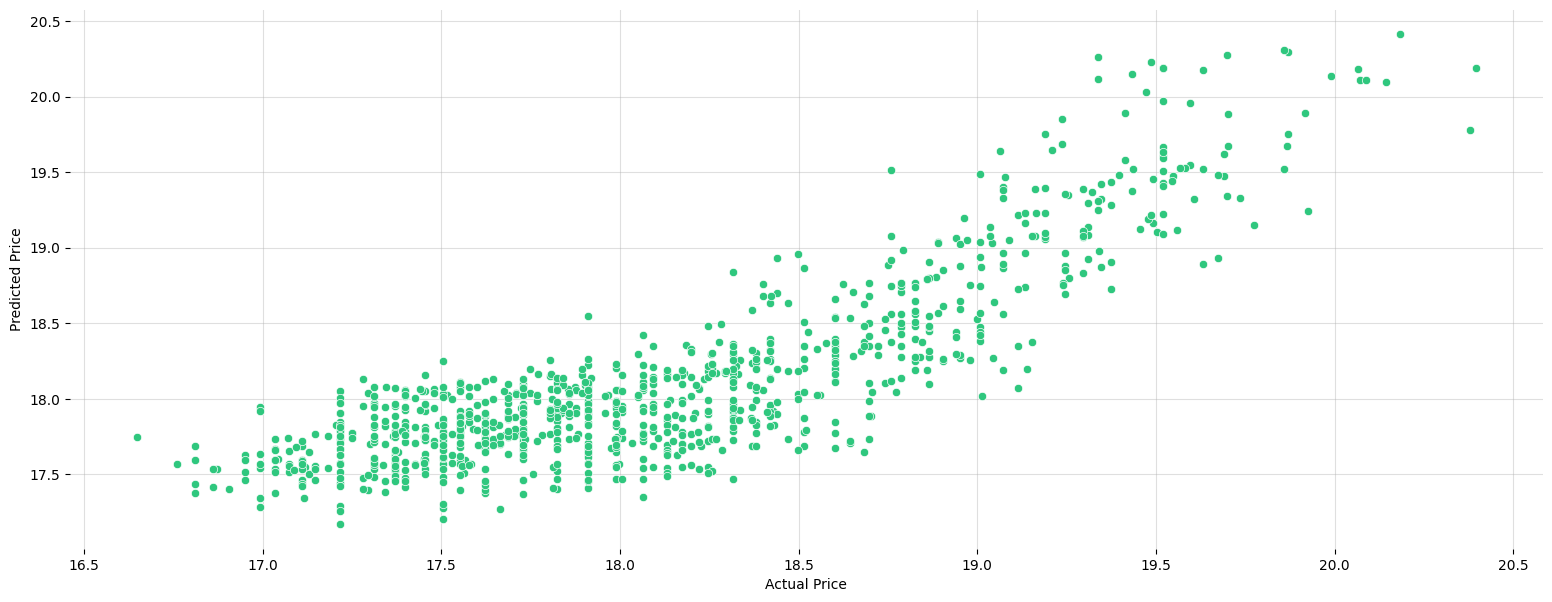

In [98]:
scores(lr, 'Linear Regression')